In [3]:
import numpy as np
from numpy import empty
import random
import matplotlib.pyplot as plt
import scipy.constants
from scipy.integrate import odeint
from functools import partial
from IPython.core.debugger import set_trace


## Randomly generate individual set of parameters within specified values

In [4]:
def generate_individual():
    
    L = random.uniform(5, 15)
    P = random.uniform(20e-3, 200e-3)
#   W = random.choice([980, 1480])
    W = 980
    
    individual = [L, P, W]
    
    return individual

## Generate initial population

In [5]:
def generate_initial_population(size):
    
    pop = np.zeros([size, 3])
    
    for i in range(size):
        
        pop[i] = generate_individual()
        
    return pop

population = generate_initial_population(100)

len(population)

100

## Determine fitness levels of the generation

In [6]:
def fitness_calc(population):
    
    solution = np.zeros(len(population))
    
    for i in range(len(population)):
    
#       solution[i] = ((individual[i][0]*individual[i][1]*individual[i][2])/3)
        solution[i] = EDFA_Model(population[i][0], population[i][1], population[i][2])

    fitness_array = np.zeros(len(solution))
    
    for i in range(len(solution)):
    
        fitness_array[i] = solution[i] 

    return fitness_array

## Select new mating pool based on fittest genes

In [7]:
def select_mating_pool(population, fitness, num_parents):
    
    parents = np.zeros([num_parents, len(population[1])])
    
    for parent_num in range(num_parents):
        
        max_fitness_i = np.where(fitness == np.min(fitness))
        
        max_fitness_i = max_fitness_i[0][0]
        
        parents[parent_num, :] = population[max_fitness_i, :]
        
        fitness[max_fitness_i] = 999999999
        
    return parents

## Mix genes to produce offspring

In [8]:
def crossover(parents, offspring_size):
    
    offspring = np.zeros((len(offspring_size), 3))            
    crossover_point = np.uint8(len(offspring_size[1])/2)
    
    for i in range(len(offspring_size)):
        
        parent1_i = (i)%parents.shape[0]
        parent2_i = (i+1)%parents.shape[0]
                         
        offspring[i, 0:crossover_point] = parents[parent1_i, 0:crossover_point]
                         
        offspring[i, crossover_point:] = parents[parent2_i, crossover_point:]
                         
    return offspring

## Mutate 1 gene (in this case fibre length)

In [9]:
def mutation(offspring_crossover):
    
    for i in range(len(offspring_crossover)):
        
        random_value = np.random.uniform(-3, 3)

        offspring_crossover[i, 0] = offspring_crossover[i, 0] + random_value
    
    return offspring_crossover

## Wrapper function 

In [111]:
def ga_wrapper(num_generations, num_parents_mating, pop_size):
    
    population = generate_initial_population(pop_size) 
    
    num_generations = 5
    generations_solutions = np.zeros((num_generations, pop_size, 3))
    generations_fitness = np.zeros((num_generations, pop_size))
                                  
    for generation in range(num_generations):
        
        fitness_array = fitness_calc(population)
        
        parents = select_mating_pool(population, fitness_array, num_parents_mating)
        
        offspring_crossover = crossover(parents, offspring_size=(pop_size-parents))
                                        
        offspring_mutation = mutation(offspring_crossover)                    
                                        
        generations_solutions[generation] = population
        generations_fitness[generation] = fitness_array
        print(len(population))                              
        population[0:parents.shape[0], :] = parents
        population[-parents.shape[0]:, :] = offspring_mutation
        
    generations = zip(generations_solutions, generations_fitness)
                                        
    return generations, generations_solutions, generations_fitness

    print("hi")
    print(list(generations))
                                        
generations = ga_wrapper(30, 50, 200)
# print(list(generations))


[[ 2.00000000e-02  1.62796528e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.50541862e-03  7.30462046e-03 -4.25969383e-75 -4.25969383e-75
  -4.25969383e-75  1.74751967e-77  1.74751967e-77  1.74751967e-77]
 [ 1.13314071e-04  3.27754296e-04 -7.54418105e-73 -7.54418105e-73
  -7.54418105e-73  1.05160366e-77  1.05160366e-77  1.05160366e-77]
 [ 8.52949840e-06  1.47068962e-05 -1.33233392e-70 -1.33233392e-70
  -1.33233392e-70  6.27103440e-78  6.27103440e-78  6.27103440e-78]
 [ 6.41890510e-07  6.59927643e-07 -2.35991504e-68 -2.35991504e-68
  -2.35991504e-68  3.71624253e-78  3.71624253e-78  3.71624253e-78]
 [ 4.78768625e-08  2.87051485e-08 -4.38803638e-66 -4.38803638e-66
  -4.38803638e-66  2.34062103e-78  2.34062103e-78  2.34062103e-78]
 [ 3.66622809e-09  1.43176506e-09 -8.40923984e-64 -8.40923984e-64
  -8.40923984e-64  1.31745835e-78  1.31745835e-78  1.31745835e-78]
 [ 1.97353340e-10  4.77716492e-11 -5.81144808e-62 -5.81144808e-62
  -

C:\Users\Yossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in log10



[[ 2.00000000e-02  1.86359958e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.64471933e-03  1.64426579e-02 -1.56678743e-75 -1.56678743e-75
  -1.56678743e-75  2.20134599e-77  2.20134599e-77  2.20134599e-77]
 [ 3.49726721e-04  1.45074287e-03 -9.06487170e-74 -9.06487170e-74
  -9.06487170e-74  1.50727242e-77  1.50727242e-77  1.50727242e-77]
 [ 4.62463571e-05  1.27999373e-04 -5.18492588e-72 -5.18492588e-72
  -5.18492588e-72  1.00634966e-77  1.00634966e-77  1.00634966e-77]
 [ 6.11561690e-06  1.12941404e-05 -2.96681207e-70 -2.96681207e-70
  -2.96681207e-70  6.71611885e-78  6.71611885e-78  6.71611885e-78]
 [ 8.08645793e-07  9.96097131e-07 -1.70081579e-68 -1.70081579e-68
  -1.70081579e-68  4.48409241e-78  4.48409241e-78  4.48409241e-78]
 [ 1.07183525e-07  8.86037603e-08 -9.87642809e-67 -9.87642809e-67
  -9.87642809e-67  2.96775691e-78  2.96775691e-78  2.96775691e-78]
 [ 1.39321764e-08  7.51808673e-09 -6.01648129e-65 -6.01648129e-65
  

  -2.98365406e-68  2.09683206e-78  2.09683206e-78  2.09683206e-78]]
[[ 2.00000000e-02  6.40191297e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.80641179e-03  6.06534503e-03 -4.77210104e-76 -4.77210104e-76
  -4.77210104e-76  7.62922568e-78  7.62922568e-78  7.62922568e-78]
 [ 3.93796556e-04  5.74644290e-04 -2.45598882e-74 -2.45598882e-74
  -2.45598882e-74  5.30131715e-78  5.30131715e-78  5.30131715e-78]
 [ 5.52581013e-05  5.44443483e-05 -1.24784084e-72 -1.24784084e-72
  -1.24784084e-72  3.58244639e-78  3.58244639e-78  3.58244639e-78]
 [ 7.75406523e-06  5.15802160e-06 -6.34057824e-71 -6.34057824e-71
  -6.34057824e-71  2.41985181e-78  2.41985181e-78  2.41985181e-78]
 [ 1.08771696e-06  4.88814855e-07 -3.22500832e-69 -3.22500832e-69
  -3.22500832e-69  1.62181665e-78  1.62181665e-78  1.62181665e-78]
 [ 1.52548453e-07  4.58222977e-08 -1.67213434e-67 -1.67213434e-67
  -1.67213434e-67  1.16783782e-78  1.16783782e-78  1.16783782e-78]
 

  -2.78069097e-62  5.88816831e-79  5.88816831e-79  5.88816831e-79]]
[[ 2.00000000e-02  4.82714541e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.71269077e-03  6.39854575e-03 -2.03241354e-76 -2.03241354e-76
  -2.03241354e-76  5.96402760e-78  5.96402760e-78  5.96402760e-78]
 [ 6.89202457e-04  8.48145128e-04 -6.04321214e-75 -6.04321214e-75
  -6.04321214e-75  4.46413973e-78  4.46413973e-78  4.46413973e-78]
 [ 1.27939504e-04  1.12423963e-04 -1.75479491e-73 -1.75479491e-73
  -1.75479491e-73  3.19471018e-78  3.19471018e-78  3.19471018e-78]
 [ 2.37506218e-05  1.49030471e-05 -5.09499014e-72 -5.09499014e-72
  -5.09499014e-72  2.28180972e-78  2.28180972e-78  2.28180972e-78]
 [ 4.40902545e-06  1.97529380e-06 -1.47975924e-70 -1.47975924e-70
  -1.47975924e-70  1.62980253e-78  1.62980253e-78  1.62980253e-78]
 [ 8.18335814e-07  2.62034589e-07 -4.30543563e-69 -4.30543563e-69
  -4.30543563e-69  1.15577758e-78  1.15577758e-78  1.15577758e-78]
 

  -3.81069497e-65  3.85169667e-79  3.85169667e-79  3.85169667e-79]]
[[ 2.00000000e-02  1.22498540e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38431213e-03  4.97021818e-03 -3.79280598e-75 -3.79280598e-75
  -3.79280598e-75  1.29481147e-77  1.29481147e-77  1.29481147e-77]
 [ 9.58158107e-05  2.01659195e-04 -7.93959608e-73 -7.93959608e-73
  -7.93959608e-73  7.65205570e-78  7.65205570e-78  7.65205570e-78]
 [ 6.63180806e-06  8.18135527e-06 -1.65960752e-70 -1.65960752e-70
  -1.65960752e-70  4.48715394e-78  4.48715394e-78  4.48715394e-78]
 [ 4.59002337e-07  3.32702899e-07 -3.47193584e-68 -3.47193584e-68
  -3.47193584e-68  2.61859194e-78  2.61859194e-78  2.61859194e-78]
 [ 3.13761924e-08  1.30281801e-08 -7.70036208e-66 -7.70036208e-66
  -7.70036208e-66  1.52422718e-78  1.52422718e-78  1.52422718e-78]
 [ 2.25095964e-09  6.22266741e-10 -1.79614573e-63 -1.79614573e-63
  -1.79614573e-63  8.61924502e-79  8.61924502e-79  8.61924502e-79]
 

  -3.53722905e-62  6.95697348e-79  6.95697348e-79  6.95697348e-79]]
[[ 2.00000000e-02  1.38744692e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.11420604e-03  9.35744177e-03 -1.83369379e-75 -1.83369379e-75
  -1.83369379e-75  1.58112015e-77  1.58112015e-77  1.58112015e-77]
 [ 2.23493240e-04  6.31098606e-04 -1.65268225e-73 -1.65268225e-73
  -1.65268225e-73  1.02642791e-77  1.02642791e-77  1.02642791e-77]
 [ 2.36256928e-05  4.25645225e-05 -1.47940598e-71 -1.47940598e-71
  -1.47940598e-71  6.55063441e-78  6.55063441e-78  6.55063441e-78]
 [ 2.49753011e-06  2.87044963e-06 -1.32453892e-69 -1.32453892e-69
  -1.32453892e-69  4.18129433e-78  4.18129433e-78  4.18129433e-78]
 [ 2.64048725e-07  1.93876325e-07 -1.19342393e-67 -1.19342393e-67
  -1.19342393e-67  2.65391070e-78  2.65391070e-78  2.65391070e-78]
 [ 2.75728801e-08  1.26164760e-08 -1.12301190e-65 -1.12301190e-65
  -1.12301190e-65  1.71252786e-78  1.71252786e-78  1.71252786e-78]
 

  -3.68553843e-64  1.36267984e-78  1.36267984e-78  1.36267984e-78]]
[[ 2.00000000e-02  5.31844960e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.14745140e-03  3.65474501e-03 -6.81144087e-76 -6.81144087e-76
  -6.81144087e-76  6.07671442e-78  6.07671442e-78  6.07671442e-78]
 [ 2.30576815e-04  2.51146279e-04 -5.95213070e-74 -5.95213070e-74
  -5.95213070e-74  3.95909391e-78  3.95909391e-78  3.95909391e-78]
 [ 2.47580385e-05  1.72588983e-05 -5.16510638e-72 -5.16510638e-72
  -5.16510638e-72  2.53493766e-78  2.53493766e-78  2.53493766e-78]
 [ 2.65805657e-06  1.18540598e-06 -4.49339500e-70 -4.49339500e-70
  -4.49339500e-70  1.62359366e-78  1.62359366e-78  1.62359366e-78]
 [ 2.86271361e-07  8.22955369e-08 -3.95439138e-68 -3.95439138e-68
  -3.95439138e-68  1.03408863e-78  1.03408863e-78  1.03408863e-78]
 [ 3.03771937e-08  5.61471427e-09 -3.71724654e-66 -3.71724654e-66
  -3.71724654e-66  5.48707829e-79  5.48707829e-79  5.48707829e-79]
 

  -4.72308219e-63  9.97946183e-79  9.97946183e-79  9.97946183e-79]]
[[ 2.00000000e-02  1.29679231e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.08868568e-03  2.50934995e-02 -2.83299056e-76 -2.83299056e-76
  -2.83299056e-76  1.64039619e-77  1.64039619e-77  1.64039619e-77]
 [ 1.29473545e-03  4.85569492e-03 -4.59169753e-75 -4.59169753e-75
  -4.59169753e-75  1.35375845e-77  1.35375845e-77  1.35375845e-77]
 [ 3.29424733e-04  9.39595643e-04 -7.10947515e-74 -7.10947515e-74
  -7.10947515e-74  1.03644007e-77  1.03644007e-77  1.03644007e-77]
 [ 8.38168290e-05  1.81815278e-04 -1.09837712e-72 -1.09837712e-72
  -1.09837712e-72  7.88683684e-78  7.88683684e-78  7.88683684e-78]
 [ 2.13260762e-05  3.51830174e-05 -1.69715106e-71 -1.69715106e-71
  -1.69715106e-71  5.99868724e-78  5.99868724e-78  5.99868724e-78]
 [ 5.42619129e-06  6.80796797e-06 -2.62253792e-70 -2.62253792e-70
  -2.62253792e-70  4.56374384e-78  4.56374384e-78  4.56374384e-78]
 

  -7.07710099e-63  1.47859868e-78  1.47859868e-78  1.47859868e-78]]
[[ 2.00000000e-02  1.62064301e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.43577436e-03  4.15692711e-02 -2.13592285e-76 -2.13592285e-76
  -2.13592285e-76  2.04346398e-77  2.04346398e-77  2.04346398e-77]
 [ 2.07095886e-03  1.06624493e-02 -2.23301126e-75 -2.23301126e-75
  -2.23301126e-75  1.84044735e-77  1.84044735e-77  1.84044735e-77]
 [ 6.66410778e-04  2.73489864e-03 -2.17011104e-74 -2.17011104e-74
  -2.17011104e-74  1.48893169e-77  1.48893169e-77  1.48893169e-77]
 [ 2.14443256e-04  7.01495793e-04 -2.09689177e-73 -2.09689177e-73
  -2.09689177e-73  1.18909624e-77  1.18909624e-77  1.18909624e-77]
 [ 6.90053422e-05  1.79932276e-04 -2.02518745e-72 -2.02518745e-72
  -2.02518745e-72  9.48062099e-78  9.48062099e-78  9.48062099e-78]
 [ 2.22053128e-05  4.61532644e-05 -1.95622055e-71 -1.95622055e-71
  -1.95622055e-71  7.55767178e-78  7.55767178e-78  7.55767178e-78]
 

  -1.23112042e-64  5.96579250e-79  5.96579250e-79  5.96579250e-79]]
[[ 2.00000000e-02  2.70486058e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.11711951e-04  6.64872978e-04 -1.93413658e-75 -1.93413658e-75
  -1.93413658e-75  2.64138135e-78  2.64138135e-78  2.64138135e-78]
 [ 4.15621050e-05  1.63431146e-05 -9.32314786e-73 -9.32314786e-73
  -9.32314786e-73  1.43028830e-78  1.43028830e-78  1.43028830e-78]
 [ 1.89432691e-06  4.01955037e-07 -4.49993732e-70 -4.49993732e-70
  -4.49993732e-70  7.65478524e-79  7.65478524e-79  7.65478524e-79]
 [ 8.52042707e-08  9.83444759e-09 -2.39443034e-67 -2.39443034e-67
  -2.39443034e-67  3.23510105e-79  3.23510105e-79  3.23510105e-79]
 [ 4.41782274e-09  3.58786198e-10 -1.21322950e-64 -1.21322950e-64
  -1.21322950e-64  2.60637359e-79  2.60637359e-79  2.60637359e-79]
 [-1.42441581e-10 -2.30664275e-11 -3.01613240e-63 -3.01613240e-63
  -3.01613240e-63  4.13001169e-79  4.13001169e-79  4.13001169e-79]
 

  -6.08070396e-65  1.46860631e-78  1.46860631e-78  1.46860631e-78]]
[[ 2.00000000e-02  6.58429907e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.22222468e-03  2.30067004e-03 -2.61700306e-75 -2.61700306e-75
  -2.61700306e-75  6.79962701e-78  6.79962701e-78  6.79962701e-78]
 [ 7.46917902e-05  8.03901693e-05 -7.02381005e-73 -7.02381005e-73
  -7.02381005e-73  3.91319401e-78  3.91319401e-78  3.91319401e-78]
 [ 4.56474973e-06  2.80903251e-06 -1.88400526e-70 -1.88400526e-70
  -1.88400526e-70  2.23860342e-78  2.23860342e-78  2.23860342e-78]
 [ 2.79592800e-07  9.88359747e-08 -5.13642384e-68 -5.13642384e-68
  -5.13642384e-68  1.28687546e-78  1.28687546e-78  1.28687546e-78]
 [ 1.71677168e-08  3.67241193e-09 -1.51798259e-65 -1.51798259e-65
  -1.51798259e-65  5.88845513e-79  5.88845513e-79  5.88845513e-79]
 [ 1.16410446e-09  1.75848314e-10 -4.31162703e-63 -4.31162703e-63
  -4.31162703e-63  4.24244423e-79  4.24244423e-79  4.24244423e-79]
 

  -1.71834321e-64  1.36371806e-78  1.36371806e-78  1.36371806e-78]]
[[ 2.00000000e-02  1.87973728e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.71960194e-03  9.89405888e-03 -3.76518672e-75 -3.76518672e-75
  -3.76518672e-75  2.06680469e-77  2.06680469e-77  2.06680469e-77]
 [ 1.47851324e-04  5.20775071e-04 -5.11650772e-73 -5.11650772e-73
  -5.11650772e-73  1.28052682e-77  1.28052682e-77  1.28052682e-77]
 [ 1.27123997e-05  2.74118186e-05 -6.92341233e-71 -6.92341233e-71
  -6.92341233e-71  7.84096896e-78  7.84096896e-78  7.84096896e-78]
 [ 1.09306787e-06  1.44283823e-06 -9.38227109e-69 -9.38227109e-69
  -9.38227109e-69  4.80180818e-78  4.80180818e-78  4.80180818e-78]
 [ 9.42708059e-08  7.67177718e-08 -1.29290965e-66 -1.29290965e-66
  -1.29290965e-66  2.91922673e-78  2.91922673e-78  2.91922673e-78]
 [ 8.02997257e-09  4.04769905e-09 -1.87605603e-64 -1.87605603e-64
  -1.87605603e-64  1.45857978e-78  1.45857978e-78  1.45857978e-78]
 

[[ 2.00000000e-02  5.72827114e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.31390036e-03  4.30527808e-03 -6.31040476e-76 -6.31040476e-76
  -6.31040476e-76  6.62588975e-78  6.62588975e-78  6.62588975e-78]
 [ 2.67706127e-04  3.23576198e-04 -4.75569617e-74 -4.75569617e-74
  -4.75569617e-74  4.39298849e-78  4.39298849e-78  4.39298849e-78]
 [ 3.09726629e-05  2.43201709e-05 -3.55436879e-72 -3.55436879e-72
  -3.55436879e-72  2.85523320e-78  2.85523320e-78  2.85523320e-78]
 [ 3.58355436e-06  1.82790878e-06 -2.66097218e-70 -2.66097218e-70
  -2.66097218e-70  1.85563983e-78  1.85563983e-78  1.85563983e-78]
 [ 4.15338866e-07  1.38258845e-07 -2.01523000e-68 -2.01523000e-68
  -2.01523000e-68  1.19671135e-78  1.19671135e-78  1.19671135e-78]
 [ 4.73093309e-08  1.00544090e-08 -1.60034723e-66 -1.60034723e-66
  -1.60034723e-66  7.16173561e-79  7.16173561e-79  7.16173561e-79]
 [ 5.81359416e-09  9.43402923e-10 -1.29181213e-64 -1.29181213e-64
  -

   1.38943044e-64  6.02185346e-79  6.02185346e-79  6.02185346e-79]]
[[ 2.00000000e-02  1.85966418e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.09170935e-03  2.77002874e-02 -6.40760688e-76 -6.40760688e-76
  -6.40760688e-76  2.32004216e-77  2.32004216e-77  2.32004216e-77]
 [ 8.37103774e-04  4.12603808e-03 -1.57758415e-74 -1.57758415e-74
  -1.57758415e-74  1.78626293e-77  1.78626293e-77  1.78626293e-77]
 [ 1.71259055e-04  6.14584454e-04 -3.77268433e-73 -3.77268433e-73
  -3.77268433e-73  1.30458616e-77  1.30458616e-77  1.30458616e-77]
 [ 3.50370564e-05  9.15439730e-05 -9.01430566e-72 -9.01430566e-72
  -9.01430566e-72  9.50000228e-78  9.50000228e-78  9.50000228e-78]
 [ 7.16821476e-06  1.36362450e-05 -2.15455695e-70 -2.15455695e-70
  -2.15455695e-70  6.91785116e-78  6.91785116e-78  6.91785116e-78]
 [ 1.46653981e-06  2.03097929e-06 -5.14938896e-69 -5.14938896e-69
  -5.14938896e-69  5.03827101e-78  5.03827101e-78  5.03827101e-78]
 

  -1.29255391e-66  5.20733241e-79  5.20733241e-79  5.20733241e-79]]
[[ 2.00000000e-02  3.65501390e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.60083111e-03  1.76550241e-03 -8.45377208e-76 -8.45377208e-76
  -8.45377208e-76  3.96751636e-78  3.96751636e-78  3.96751636e-78]
 [ 1.28132487e-04  8.52791844e-05 -1.32474759e-73 -1.32474759e-73
  -1.32474759e-73  2.41969840e-78  2.41969840e-78  2.41969840e-78]
 [ 1.02562864e-05  4.11929524e-06 -2.06914660e-71 -2.06914660e-71
  -2.06914660e-71  1.46097677e-78  1.46097677e-78  1.46097677e-78]
 [ 8.20818593e-07  1.99135061e-07 -3.23985056e-69 -3.23985056e-69
  -3.23985056e-69  8.75887401e-79  8.75887401e-79  8.75887401e-79]
 [ 6.47780065e-08  9.27664325e-09 -5.41845379e-67 -5.41845379e-67
  -5.41845379e-67  5.19339738e-79  5.19339738e-79  5.19339738e-79]
 [ 5.55534815e-09  5.75940067e-10 -9.14829799e-65 -9.14829799e-65
  -9.14829799e-65  3.11759099e-79  3.11759099e-79  3.11759099e-79]
 

[[ 2.00000000e-02  1.20606532e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68138770e-03  6.17925401e-03 -2.52742458e-75 -2.52742458e-75
  -2.52742458e-75  1.32078269e-77  1.32078269e-77  1.32078269e-77]
 [ 1.41352973e-04  3.16591608e-04 -3.59165261e-73 -3.59165261e-73
  -3.59165261e-73  8.14259564e-78  8.14259564e-78  8.14259564e-78]
 [ 1.18836386e-05  1.62209855e-05 -5.08387240e-71 -5.08387240e-71
  -5.08387240e-71  4.96371094e-78  4.96371094e-78  4.96371094e-78]
 [ 9.98887743e-07  8.31752408e-07 -7.22015191e-69 -7.22015191e-69
  -7.22015191e-69  3.00625287e-78  3.00625287e-78  3.00625287e-78]
 [ 8.32614936e-08  4.18173787e-08 -1.09973869e-66 -1.09973869e-66
  -1.09973869e-66  1.91936785e-78  1.91936785e-78  1.91936785e-78]
 [ 7.09309379e-09  2.31464390e-09 -1.61898798e-64 -1.61898798e-64
  -1.61898798e-64  9.33748545e-79  9.33748545e-79  9.33748545e-79]
 [ 6.39278310e-10  1.51195914e-10 -2.49796978e-62 -2.49796978e-62
  -

  -1.20351360e-64  9.45140584e-79  9.45140584e-79  9.45140584e-79]]
[[ 2.00000000e-02  4.15389402e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.92790667e-03  2.50797189e-03 -6.61110475e-76 -6.61110475e-76
  -6.61110475e-76  4.65988417e-78  4.65988417e-78  4.65988417e-78]
 [ 1.85840744e-04  1.51421523e-04 -7.15662127e-74 -7.15662127e-74
  -7.15662127e-74  2.96194807e-78  2.96194807e-78  2.96194807e-78]
 [ 1.79144692e-05  9.14249322e-06 -7.70976321e-72 -7.70976321e-72
  -7.70976321e-72  1.85607213e-78  1.85607213e-78  1.85607213e-78]
 [ 1.72679067e-06  5.52952267e-07 -8.32247889e-70 -8.32247889e-70
  -8.32247889e-70  1.15432038e-78  1.15432038e-78  1.15432038e-78]
 [ 1.66249470e-07  3.30128139e-08 -9.15177982e-68 -9.15177982e-68
  -9.15177982e-68  7.72279482e-79  7.72279482e-79  7.72279482e-79]
 [ 1.64444216e-08  2.32043021e-09 -1.08617752e-65 -1.08617752e-65
  -1.08617752e-65  2.98111739e-79  2.98111739e-79  2.98111739e-79]
 

  -2.14858333e-63  8.74129977e-79  8.74129977e-79  8.74129977e-79]]
[[ 2.00000000e-02  9.49466480e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.74305637e-03  5.07945443e-03 -1.85074392e-75 -1.85074392e-75
  -1.85074392e-75  1.04647134e-77  1.04647134e-77  1.04647134e-77]
 [ 1.51911996e-04  2.71739524e-04 -2.44809898e-73 -2.44809898e-73
  -2.44809898e-73  6.50309780e-78  6.50309780e-78  6.50309780e-78]
 [ 1.32399632e-05  1.45383428e-05 -3.22509460e-71 -3.22509460e-71
  -3.22509460e-71  3.99352331e-78  3.99352331e-78  3.99352331e-78]
 [ 1.15359713e-06  7.77262975e-07 -4.25810291e-69 -4.25810291e-69
  -4.25810291e-69  2.44424258e-78  2.44424258e-78  2.44424258e-78]
 [ 1.00480803e-07  4.11158444e-08 -5.70468155e-67 -5.70468155e-67
  -5.70468155e-67  1.59939567e-78  1.59939567e-78  1.59939567e-78]
 [ 8.83717392e-09  2.40157018e-09 -8.44788488e-65 -8.44788488e-65
  -8.44788488e-65  8.11348852e-79  8.11348852e-79  8.11348852e-79]
 

   2.21275625e-64  8.40310411e-79  8.40310411e-79  8.40310411e-79]]
[[ 2.00000000e-02  4.68076422e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.94961952e-03  6.68263041e-03 -1.73502195e-76 -1.73502195e-76
  -1.73502195e-76  5.82019776e-78  5.82019776e-78  5.82019776e-78]
 [ 7.79973448e-04  9.54061235e-04 -4.57451406e-75 -4.57451406e-75
  -4.57451406e-75  4.43463408e-78  4.43463408e-78  4.43463408e-78]
 [ 1.54029596e-04  1.36208692e-04 -1.17394318e-73 -1.17394318e-73
  -1.17394318e-73  3.21483651e-78  3.21483651e-78  3.21483651e-78]
 [ 3.04183810e-05  1.94468557e-05 -3.01135784e-72 -3.01135784e-72
  -3.01135784e-72  2.32474352e-78  2.32474352e-78  2.32474352e-78]
 [ 6.00713673e-06  2.77612347e-06 -7.72426637e-71 -7.72426637e-71
  -7.72426637e-71  1.68129792e-78  1.68129792e-78  1.68129792e-78]
 [ 1.18605104e-06  3.96408337e-07 -1.98745665e-69 -1.98745665e-69
  -1.98745665e-69  1.20795698e-78  1.20795698e-78  1.20795698e-78]
 

  -3.18598589e-63  4.49309912e-79  4.49309912e-79  4.49309912e-79]]
[[ 2.00000000e-02  1.63552008e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.50735298e-03  1.35356262e-02 -1.53182754e-75 -1.53182754e-75
  -1.53182754e-75  1.91614102e-77  1.91614102e-77  1.91614102e-77]
 [ 3.14340635e-04  1.12021063e-03 -9.84773727e-74 -9.84773727e-74
  -9.84773727e-74  1.29503402e-77  1.29503402e-77  1.29503402e-77]
 [ 3.94081453e-05  9.27092028e-05 -6.26727741e-72 -6.26727741e-72
  -6.26727741e-72  8.55366467e-78  8.55366467e-78  8.55366467e-78]
 [ 4.94067446e-06  7.67277491e-06 -3.98969783e-70 -3.98969783e-70
  -3.98969783e-70  5.64884892e-78  5.64884892e-78  5.64884892e-78]
 [ 6.19279854e-07  6.35144243e-07 -2.54688570e-68 -2.54688570e-68
  -2.54688570e-68  3.70513243e-78  3.70513243e-78  3.70513243e-78]
 [ 7.75585957e-08  5.20240283e-08 -1.65385542e-66 -1.65385542e-66
  -1.65385542e-66  2.59801800e-78  2.59801800e-78  2.59801800e-78]
 

  -8.21699611e-64  4.55610783e-79  4.55610783e-79  4.55610783e-79]]
[[ 2.00000000e-02  1.01002980e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.31538405e-04  1.90625998e-03 -1.12223935e-74 -1.12223935e-74
  -1.12223935e-74  9.45031133e-78  9.45031133e-78  9.45031133e-78]
 [ 2.67574265e-05  3.59775212e-05 -8.39667903e-72 -8.39667903e-72
  -8.39667903e-72  4.88876084e-78  4.88876084e-78  4.88876084e-78]
 [ 9.79384468e-07  6.80389505e-07 -6.34294069e-69 -6.34294069e-69
  -6.34294069e-69  2.51650386e-78  2.51650386e-78  2.51650386e-78]
 [ 3.60024312e-08  1.36840675e-08 -5.35447576e-66 -5.35447576e-66
  -5.35447576e-66  1.13610363e-78  1.13610363e-78  1.13610363e-78]
 [ 1.44998161e-09  3.57685062e-10 -4.41442744e-63 -4.41442744e-63
  -4.41442744e-63  6.75164742e-79  6.75164742e-79  6.75164742e-79]
 [-4.85825413e-10 -1.52102114e-10 -1.11039390e-63 -1.11039390e-63
  -1.11039390e-63  1.30339285e-78  1.30339285e-78  1.30339285e-78]
 

  -2.27855158e-65  6.18160328e-79  6.18160328e-79  6.18160328e-79]]
[[ 2.00000000e-02  1.91628191e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.13635048e-03  3.74980774e-02 -4.10457680e-76 -4.10457680e-76
  -4.10457680e-76  2.42472772e-77  2.42472772e-77  2.42472772e-77]
 [ 1.31910435e-03  7.33766934e-03 -6.53610605e-75 -6.53610605e-75
  -6.53610605e-75  2.00743634e-77  2.00743634e-77  2.00743634e-77]
 [ 3.38768863e-04  1.43584263e-03 -9.93397467e-74 -9.93397467e-74
  -9.93397467e-74  1.54010444e-77  1.54010444e-77  1.54010444e-77]
 [ 8.70016602e-05  2.80966804e-04 -1.50640689e-72 -1.50640689e-72
  -1.50640689e-72  1.17416576e-77  1.17416576e-77  1.17416576e-77]
 [ 2.23435919e-05  5.49803911e-05 -2.28442366e-71 -2.28442366e-71
  -2.28442366e-71  8.94683840e-78  8.94683840e-78  8.94683840e-78]
 [ 5.73837274e-06  1.07590643e-05 -3.46482438e-70 -3.46482438e-70
  -3.46482438e-70  6.81879244e-78  6.81879244e-78  6.81879244e-78]
 

  -1.76797282e-68  3.81400137e-78  3.81400137e-78  3.81400137e-78]]
[[ 2.00000000e-02  1.66167936e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.61474412e-03  1.44619275e-02 -1.42966059e-75 -1.42966059e-75
  -1.42966059e-75  1.95943217e-77  1.95943217e-77  1.95943217e-77]
 [ 3.41843994e-04  1.25864700e-03 -8.45986166e-74 -8.45986166e-74
  -8.45986166e-74  1.33788228e-77  1.33788228e-77  1.33788228e-77]
 [ 4.46916667e-05  1.09542210e-04 -4.95081750e-72 -4.95081750e-72
  -4.95081750e-72  8.91192458e-78  8.91192458e-78  8.91192458e-78]
 [ 5.84302962e-06  9.53374505e-06 -2.89794598e-70 -2.89794598e-70
  -2.89794598e-70  5.93513216e-78  5.93513216e-78  5.93513216e-78]
 [ 7.63720314e-07  8.29403756e-07 -1.70062134e-68 -1.70062134e-68
  -1.70062134e-68  3.93586804e-78  3.93586804e-78  3.93586804e-78]
 [ 9.89124834e-08  7.09044821e-08 -1.08110875e-66 -1.08110875e-66
  -1.08110875e-66  2.69458193e-78  2.69458193e-78  2.69458193e-78]
 

  -8.01193543e-65  3.15120305e-79  3.15120305e-79  3.15120305e-79]]
[[ 2.00000000e-02  1.24771856e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.72846053e-03  1.14283041e-02 -9.84770131e-76 -9.84770131e-76
  -9.84770131e-76  1.48076167e-77  1.48076167e-77  1.48076167e-77]
 [ 3.72224373e-04  1.04675611e-03 -5.35759764e-74 -5.35759764e-74
  -5.35759764e-74  1.02172586e-77  1.02172586e-77  1.02172586e-77]
 [ 5.07798827e-05  9.58757983e-05 -2.87927310e-72 -2.87927310e-72
  -2.87927310e-72  6.86490051e-78  6.86490051e-78  6.86490051e-78]
 [ 6.92743958e-06  8.78102249e-06 -1.54907968e-70 -1.54907968e-70
  -1.54907968e-70  4.61037028e-78  4.61037028e-78  4.61037028e-78]
 [ 9.44964020e-07  8.05268620e-07 -8.35089950e-69 -8.35089950e-69
  -8.35089950e-69  3.07316101e-78  3.07316101e-78  3.07316101e-78]
 [ 1.29246163e-07  7.42338309e-08 -4.55398449e-67 -4.55398449e-67
  -4.55398449e-67  2.10715340e-78  2.10715340e-78  2.10715340e-78]
 

   1.03589186e-62  6.19554893e-79  6.19554893e-79  6.19554893e-79]]
[[ 2.00000000e-02  1.54749120e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.16253440e-03  3.04668679e-02 -3.27916277e-76 -3.27916277e-76
  -3.27916277e-76  1.95836998e-77  1.95836998e-77  1.95836998e-77]
 [ 1.33258755e-03  5.99828257e-03 -5.17166483e-75 -5.17166483e-75
  -5.17166483e-75  1.62417762e-77  1.62417762e-77  1.62417762e-77]
 [ 3.43976141e-04  1.18093345e-03 -7.78112401e-74 -7.78112401e-74
  -7.78112401e-74  1.24748693e-77  1.24748693e-77  1.24748693e-77]
 [ 8.87893050e-05  2.32500329e-04 -1.16800684e-72 -1.16800684e-72
  -1.16800684e-72  9.52059364e-78  9.52059364e-78  9.52059364e-78]
 [ 2.29190826e-05  4.57753875e-05 -1.75338445e-71 -1.75338445e-71
  -1.75338445e-71  7.26234739e-78  7.26234739e-78  7.26234739e-78]
 [ 5.91618231e-06  9.01222865e-06 -2.63266052e-70 -2.63266052e-70
  -2.63266052e-70  5.54092106e-78  5.54092106e-78  5.54092106e-78]
 

  -2.64193448e-64  5.39956686e-79  5.39956686e-79  5.39956686e-79]]
[[ 2.00000000e-02  1.40621056e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.95199413e-04  3.38156799e-03 -1.04293353e-74 -1.04293353e-74
  -1.04293353e-74  1.36837582e-77  1.36837582e-77  1.36837582e-77]
 [ 4.00689535e-05  8.13169534e-05 -5.21197019e-72 -5.21197019e-72
  -5.21197019e-72  7.37892917e-78  7.37892917e-78  7.37892917e-78]
 [ 1.79356805e-06  1.95540767e-06 -2.60441885e-69 -2.60441885e-69
  -2.60441885e-69  3.96616333e-78  3.96616333e-78  3.96616333e-78]
 [ 8.03982356e-08  4.71185720e-08 -1.32411470e-66 -1.32411470e-66
  -1.32411470e-66  2.18252837e-78  2.18252837e-78  2.18252837e-78]
 [ 3.61368272e-09  1.20767407e-09 -7.45183738e-64 -7.45183738e-64
  -7.45183738e-64  1.10872186e-78  1.10872186e-78  1.10872186e-78]
 [-2.02002868e-10 -7.21437365e-11 -1.00009876e-62 -1.00009876e-62
  -1.00009876e-62  1.16003802e-79  1.16003802e-79  1.16003802e-79]
 

  -8.30766209e-64  6.82836659e-79  6.82836659e-79  6.82836659e-79]]
[[ 2.00000000e-02  5.72827114e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.48649765e-03  2.53153647e-03 -1.53741259e-75 -1.53741259e-75
  -1.53741259e-75  6.13472782e-78  6.13472782e-78  6.13472782e-78]
 [ 1.10483462e-04  1.11877349e-04 -2.79244806e-73 -2.79244806e-73
  -2.79244806e-73  3.68157724e-78  3.68157724e-78  3.68157724e-78]
 [ 8.21194901e-06  4.94426049e-06 -5.05794023e-71 -5.05794023e-71
  -5.05794023e-71  2.19013408e-78  2.19013408e-78  2.19013408e-78]
 [ 6.10570327e-07  2.18917393e-07 -9.24982731e-69 -9.24982731e-69
  -9.24982731e-69  1.29620129e-78  1.29620129e-78  1.29620129e-78]
 [ 4.48125159e-08  9.45451128e-09 -1.78324362e-66 -1.78324362e-66
  -1.78324362e-66  6.95997677e-79  6.95997677e-79  6.95997677e-79]
 [ 3.60220932e-09  5.51973869e-10 -3.55960927e-64 -3.55960927e-64
  -3.55960927e-64  3.95631460e-79  3.95631460e-79  3.95631460e-79]
 

  -8.59064407e-65  4.29512200e-79  4.29512200e-79  4.29512200e-79]]
[[ 2.00000000e-02  1.49587492e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.53914223e-03  1.25685055e-02 -1.36576538e-75 -1.36576538e-75
  -1.36576538e-75  1.75597287e-77  1.75597287e-77  1.75597287e-77]
 [ 3.22362097e-04  1.05601910e-03 -8.56403509e-74 -8.56403509e-74
  -8.56403509e-74  1.19041778e-77  1.19041778e-77  1.19041778e-77]
 [ 4.09260500e-05  8.87271855e-05 -5.31451205e-72 -5.31451205e-72
  -5.31451205e-72  7.88271919e-78  7.88271919e-78  7.88271919e-78]
 [ 5.19601444e-06  7.45505929e-06 -3.29894880e-70 -3.29894880e-70
  -3.29894880e-70  5.21902057e-78  5.21902057e-78  5.21902057e-78]
 [ 6.59490067e-07  6.25944665e-07 -2.05259220e-68 -2.05259220e-68
  -2.05259220e-68  3.44457264e-78  3.44457264e-78  3.44457264e-78]
 [ 8.27097314e-08  5.14929775e-08 -1.42968749e-66 -1.42968749e-66
  -1.42968749e-66  2.32364744e-78  2.32364744e-78  2.32364744e-78]
 

  -9.95088826e-65  9.24808861e-79  9.24808861e-79  9.24808861e-79]]
[[ 2.00000000e-02  1.52065979e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.14888690e-03  1.65418635e-02 -8.96865952e-76 -8.96865952e-76
  -8.96865952e-76  1.84157250e-77  1.84157250e-77  1.84157250e-77]
 [ 4.95774461e-04  1.79943821e-03 -3.68005014e-74 -3.68005014e-74
  -3.68005014e-74  1.31802400e-77  1.31802400e-77  1.31802400e-77]
 [ 7.80567722e-05  1.95743721e-04 -1.48506107e-72 -1.48506107e-72
  -1.48506107e-72  9.11766253e-78  9.11766253e-78  9.11766253e-78]
 [ 1.22897775e-05  2.12938106e-05 -5.99292015e-71 -5.99292015e-71
  -5.99292015e-71  6.30045881e-78  6.30045881e-78  6.30045881e-78]
 [ 1.93502271e-06  2.31627288e-06 -2.42033822e-69 -2.42033822e-69
  -2.42033822e-69  4.35460862e-78  4.35460862e-78  4.35460862e-78]
 [ 3.04679482e-07  2.52302502e-07 -9.81676460e-68 -9.81676460e-68
  -9.81676460e-68  2.99275249e-78  2.99275249e-78  2.99275249e-78]
 

  -2.45755969e-64 -7.78339517e-80 -7.78339517e-80 -7.78339517e-80]]
[[ 2.00000000e-02  2.06633228e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.10363273e-03  1.38525476e-03 -2.75886215e-76 -2.75886215e-76
  -2.75886215e-76  2.35279943e-78  2.35279943e-78  2.35279943e-78]
 [ 2.21263451e-04  9.28665800e-05 -2.51176852e-74 -2.51176852e-74
  -2.51176852e-74  1.52558693e-78  1.52558693e-78  1.52558693e-78]
 [ 2.32732130e-05  6.22523865e-06 -2.27186990e-72 -2.27186990e-72
  -2.27186990e-72  9.73092635e-79  9.73092635e-79  9.73092635e-79]
 [ 2.44674809e-06  4.17089490e-07 -2.06455990e-70 -2.06455990e-70
  -2.06455990e-70  6.18138047e-79  6.18138047e-79  6.18138047e-79]
 [ 2.58591367e-07  2.86786318e-08 -1.89394014e-68 -1.89394014e-68
  -1.89394014e-68  3.80763846e-79  3.80763846e-79  3.80763846e-79]
 [ 2.61627330e-08  1.66752652e-09 -1.79329732e-66 -1.79329732e-66
  -1.79329732e-66  2.71566854e-79  2.71566854e-79  2.71566854e-79]
 

  -3.25830911e-64  4.29272119e-79  4.29272119e-79  4.29272119e-79]]
[[ 2.00000000e-02  5.38533249e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.50536631e-03  2.41627666e-03 -1.40923648e-75 -1.40923648e-75
  -1.40923648e-75  5.78078316e-78  5.78078316e-78  5.78078316e-78]
 [ 1.13306129e-04  1.08412411e-04 -2.49605744e-73 -2.49605744e-73
  -2.49605744e-73  3.47866320e-78  3.47866320e-78  3.47866320e-78]
 [ 8.52866876e-06  4.86426075e-06 -4.40864936e-71 -4.40864936e-71
  -4.40864936e-71  2.07463993e-78  2.07463993e-78  2.07463993e-78]
 [ 6.41982189e-07  2.18529604e-07 -7.82829064e-69 -7.82829064e-69
  -7.82829064e-69  1.23019422e-78  1.23019422e-78  1.23019422e-78]
 [ 4.76075548e-08  9.49653918e-09 -1.48863536e-66 -1.48863536e-66
  -1.48863536e-66  6.85530728e-79  6.85530728e-79  6.85530728e-79]
 [ 3.87254323e-09  5.61289609e-10 -2.86587303e-64 -2.86587303e-64
  -2.86587303e-64  3.76063767e-79  3.76063767e-79  3.76063767e-79]
 

  -8.01193543e-65  3.15120305e-79  3.15120305e-79  3.15120305e-79]]
[[ 2.00000000e-02  2.70486058e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.11711951e-04  6.64872978e-04 -1.93413658e-75 -1.93413658e-75
  -1.93413658e-75  2.64138135e-78  2.64138135e-78  2.64138135e-78]
 [ 4.15621050e-05  1.63431146e-05 -9.32314786e-73 -9.32314786e-73
  -9.32314786e-73  1.43028830e-78  1.43028830e-78  1.43028830e-78]
 [ 1.89432691e-06  4.01955037e-07 -4.49993732e-70 -4.49993732e-70
  -4.49993732e-70  7.65478524e-79  7.65478524e-79  7.65478524e-79]
 [ 8.52042707e-08  9.83444759e-09 -2.39443034e-67 -2.39443034e-67
  -2.39443034e-67  3.23510105e-79  3.23510105e-79  3.23510105e-79]
 [ 4.41782274e-09  3.58786198e-10 -1.21322950e-64 -1.21322950e-64
  -1.21322950e-64  2.60637359e-79  2.60637359e-79  2.60637359e-79]
 [-1.42441581e-10 -2.30664275e-11 -3.01613240e-63 -3.01613240e-63
  -3.01613240e-63  4.13001169e-79  4.13001169e-79  4.13001169e-79]
 

  -1.36357955e-63  4.32154592e-80  4.32154592e-80  4.32154592e-80]]
[[ 2.00000000e-02  1.37756215e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.86237201e-04  2.83491172e-03 -1.32484948e-74 -1.32484948e-74
  -1.32484948e-74  1.30716870e-77  1.30716870e-77  1.30716870e-77]
 [ 3.09084581e-05  5.83403862e-05 -8.58157693e-72 -8.58157693e-72
  -8.58157693e-72  6.86285214e-78  6.86285214e-78  6.86285214e-78]
 [ 1.21505470e-06  1.20032572e-06 -5.56721774e-69 -5.56721774e-69
  -5.56721774e-69  3.59549734e-78  3.59549734e-78  3.59549734e-78]
 [ 4.76946463e-08  2.43578975e-08 -3.66485295e-66 -3.66485295e-66
  -3.66485295e-66  2.00231652e-78  2.00231652e-78  2.00231652e-78]
 [ 1.89546888e-09  5.56646858e-10 -2.78824482e-63 -2.78824482e-63
  -2.78824482e-63  9.50066485e-79  9.50066485e-79  9.50066485e-79]
 [-4.10110551e-10 -1.25358569e-10 -1.71652296e-63 -1.71652296e-63
  -1.71652296e-63  1.53543069e-79  1.53543069e-79  1.53543069e-79]
 

  -1.95182955e-64  6.45986307e-79  6.45986307e-79  6.45986307e-79]]
[[ 2.00000000e-02  1.68541325e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.03291490e-03  4.00039693e-02 -2.55799725e-76 -2.55799725e-76
  -2.55799725e-76  2.13223941e-77  2.13223941e-77  2.13223941e-77]
 [ 1.81980251e-03  9.49509527e-03 -3.01260091e-75 -3.01260091e-75
  -3.01260091e-75  1.87179347e-77  1.87179347e-77  1.87179347e-77]
 [ 5.48935320e-04  2.25369525e-03 -3.32681427e-74 -3.32681427e-74
  -3.32681427e-74  1.49049507e-77  1.49049507e-77  1.49049507e-77]
 [ 1.65583832e-04  5.34922319e-04 -3.65759131e-73 -3.65759131e-73
  -3.65759131e-73  1.17441708e-77  1.17441708e-77  1.17441708e-77]
 [ 4.99475616e-05  1.26965268e-04 -4.02013933e-72 -4.02013933e-72
  -4.02013933e-72  9.24246595e-78  9.24246595e-78  9.24246595e-78]
 [ 1.50666667e-05  3.01366549e-05 -4.41926037e-71 -4.41926037e-71
  -4.41926037e-71  7.27325263e-78  7.27325263e-78  7.27325263e-78]
 

  -1.67034881e-62  1.80361542e-79  1.80361542e-79  1.80361542e-79]]
[[ 2.00000000e-02  1.62062012e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.54139806e-03  2.02980797e-02 -7.51802193e-76 -7.51802193e-76
  -7.51802193e-76  1.99167863e-77  1.99167863e-77  1.99167863e-77]
 [ 6.27074480e-04  2.54230465e-03 -2.45105589e-74 -2.45105589e-74
  -2.45105589e-74  1.47123796e-77  1.47123796e-77  1.47123796e-77]
 [ 1.11035854e-04  3.18419575e-04 -7.82149523e-73 -7.82149523e-73
  -7.82149523e-73  1.04261847e-77  1.04261847e-77  1.04261847e-77]
 [ 1.96612916e-05  3.98826056e-05 -2.49526410e-71 -2.49526410e-71
  -2.49526410e-71  7.37593659e-78  7.37593659e-78  7.37593659e-78]
 [ 3.48145424e-06  4.99478887e-06 -7.96296666e-70 -7.96296666e-70
  -7.96296666e-70  5.21936930e-78  5.21936930e-78  5.21936930e-78]
 [ 6.16348461e-07  6.25773936e-07 -2.54781101e-68 -2.54781101e-68
  -2.54781101e-68  3.66808768e-78  3.66808768e-78  3.66808768e-78]
 

  -1.56124840e-63  3.85202000e-79  3.85202000e-79  3.85202000e-79]]
[[ 2.00000000e-02  1.31957390e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.91022660e-03  1.30589989e-02 -9.13680673e-76 -9.13680673e-76
  -9.13680673e-76  1.58080065e-77  1.58080065e-77  1.58080065e-77]
 [ 4.23470414e-04  1.29236302e-03 -4.37751048e-74 -4.37751048e-74
  -4.37751048e-74  1.10858333e-77  1.10858333e-77  1.10858333e-77]
 [ 6.16196379e-05  1.27896644e-04 -2.06795772e-72 -2.06795772e-72
  -2.06795772e-72  7.54663067e-78  7.54663067e-78  7.54663067e-78]
 [ 8.96662040e-06  1.26579124e-05 -9.77211391e-71 -9.77211391e-71
  -9.77211391e-71  5.13368996e-78  5.13368996e-78  5.13368996e-78]
 [ 1.30474350e-06  1.25248401e-06 -4.62389858e-69 -4.62389858e-69
  -4.62389858e-69  3.49323371e-78  3.49323371e-78  3.49323371e-78]
 [ 1.90097266e-07  1.24528026e-07 -2.20846593e-67 -2.20846593e-67
  -2.20846593e-67  2.36070720e-78  2.36070720e-78  2.36070720e-78]
 

  -5.49990963e-63  1.09689726e-78  1.09689726e-78  1.09689726e-78]]
[[ 2.00000000e-02  4.35859908e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.70447388e-03  2.26996561e-03 -8.88712387e-76 -8.88712387e-76
  -8.88712387e-76  4.78482485e-78  4.78482485e-78  4.78482485e-78]
 [ 1.45261215e-04  1.18219634e-04 -1.22910447e-73 -1.22910447e-73
  -1.22910447e-73  2.95872695e-78  2.95872695e-78  2.95872695e-78]
 [ 1.23800685e-05  6.15696903e-06 -1.69336448e-71 -1.69336448e-71
  -1.69336448e-71  1.80902673e-78  1.80902673e-78  1.80902673e-78]
 [ 1.05488095e-06  3.20732656e-07 -2.33924380e-69 -2.33924380e-69
  -2.33924380e-69  1.09827939e-78  1.09827939e-78  1.09827939e-78]
 [ 8.93044211e-08  1.62714004e-08 -3.36327825e-67 -3.36327825e-67
  -3.36327825e-67  7.14364242e-79  7.14364242e-79  7.14364242e-79]
 [ 7.90104526e-09  1.00216182e-09 -5.04000495e-65 -5.04000495e-65
  -5.04000495e-65  3.48661293e-79  3.48661293e-79  3.48661293e-79]
 

   2.75428786e-63  3.57291982e-79  3.57291982e-79  3.57291982e-79]]
[[ 2.00000000e-02  1.58673505e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.70558777e-04  3.68999373e-03 -1.24448695e-74 -1.24448695e-74
  -1.24448695e-74  1.53572641e-77  1.53572641e-77  1.53572641e-77]
 [ 3.78936288e-05  8.58119628e-05 -6.57612745e-72 -6.57612745e-72
  -6.57612745e-72  8.23373270e-78  8.23373270e-78  8.23373270e-78]
 [ 1.64947183e-06  1.99540447e-06 -3.47880124e-69 -3.47880124e-69
  -3.47880124e-69  4.40191169e-78  4.40191169e-78  4.40191169e-78]
 [ 7.17389702e-08  4.59284081e-08 -1.87397933e-66 -1.87397933e-66
  -1.87397933e-66  2.48925782e-78  2.48925782e-78  2.48925782e-78]
 [ 3.15480734e-09  1.17021501e-09 -1.12245296e-63 -1.12245296e-63
  -1.12245296e-63  1.24557649e-78  1.24557649e-78  1.24557649e-78]
 [-1.56609617e-10 -7.45204516e-11 -1.44408663e-62 -1.44408663e-62
  -1.44408663e-62  3.36813125e-79  3.36813125e-79  3.36813125e-79]
 

   1.49394116e-63  7.89032969e-79  7.89032969e-79  7.89032969e-79]]
[[ 2.00000000e-02  6.12147897e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.13345528e-03  1.95391226e-03 -2.83001276e-75 -2.83001276e-75
  -2.83001276e-75  6.23224486e-78  6.23224486e-78  6.23224486e-78]
 [ 6.42363520e-05  6.23680174e-05 -8.82933301e-73 -8.82933301e-73
  -8.82933301e-73  3.53008968e-78  3.53008968e-78  3.53008968e-78]
 [ 3.64064077e-06  1.99075879e-06 -2.75493266e-70 -2.75493266e-70
  -2.75493266e-70  1.98936419e-78  1.98936419e-78  1.98936419e-78]
 [ 2.06618064e-07  6.36588908e-08 -8.72524620e-68 -8.72524620e-68
  -8.72524620e-68  1.14812916e-78  1.14812916e-78  1.14812916e-78]
 [ 1.18770097e-08  2.24042881e-09 -3.09263071e-65 -3.09263071e-65
  -3.09263071e-65  5.21085185e-79  5.21085185e-79  5.21085185e-79]
 [ 7.49933808e-10  9.90767774e-11 -1.01933358e-62 -1.01933358e-62
  -1.01933358e-62  3.67124862e-79  3.67124862e-79  3.67124862e-79]
 

  -2.42915938e-63  2.79337814e-79  2.79337814e-79  2.79337814e-79]]
[[ 2.00000000e-02  3.23292566e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25409960e-03  1.16508706e-03 -1.22035312e-75 -1.22035312e-75
  -1.22035312e-75  3.35487462e-78  3.35487462e-78  3.35487462e-78]
 [ 7.86383557e-05  4.19878689e-05 -3.11160877e-73 -3.11160877e-73
  -3.11160877e-73  1.94125995e-78  1.94125995e-78  1.94125995e-78]
 [ 4.93008754e-06  1.51282199e-06 -7.93774065e-71 -7.93774065e-71
  -7.93774065e-71  1.11428135e-78  1.11428135e-78  1.11428135e-78]
 [ 3.10438723e-07  5.52248859e-08 -2.05704529e-68 -2.05704529e-68
  -2.05704529e-68  6.46136102e-79  6.46136102e-79  6.46136102e-79]
 [ 1.98032701e-08  2.26066858e-09 -5.63642307e-66 -5.63642307e-66
  -5.63642307e-66  1.13239457e-79  1.13239457e-79  1.13239457e-79]
 [ 1.37169444e-09  1.09397208e-10 -1.53439329e-63 -1.53439329e-63
  -1.53439329e-63  1.32965610e-79  1.32965610e-79  1.32965610e-79]
 

  -4.06958138e-65  4.93912939e-79  4.93912939e-79  4.93912939e-79]]
[[ 2.00000000e-02  2.01596085e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.03258228e-04  4.25669920e-04 -1.85761768e-75 -1.85761768e-75
  -1.85761768e-75  1.92092116e-78  1.92092116e-78  1.92092116e-78]
 [ 3.22622432e-05  8.98818290e-06 -1.15334243e-72 -1.15334243e-72
  -1.15334243e-72  1.01336837e-78  1.01336837e-78  1.01336837e-78]
 [ 1.29597942e-06  1.90678178e-07 -7.18572779e-70 -7.18572779e-70
  -7.18572779e-70  5.21728371e-79  5.21728371e-79  5.21728371e-79]
 [ 5.14201983e-08  3.80548873e-09 -4.59975478e-67 -4.59975478e-67
  -4.59975478e-67  3.57275595e-79  3.57275595e-79  3.57275595e-79]
 [ 2.21765696e-09  1.06332807e-10 -3.04506187e-64 -3.04506187e-64
  -3.04506187e-64  1.98376444e-79  1.98376444e-79  1.98376444e-79]
 [-3.34350597e-10 -1.42157507e-11 -2.11694414e-64 -2.11694414e-64
  -2.11694414e-64 -1.45300517e-79 -1.45300517e-79 -1.45300517e-79]
 

  -1.18110777e-63  8.67082540e-79  8.67082540e-79  8.67082540e-79]]
[[ 2.00000000e-02  5.82430980e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.63586854e-03  2.88739419e-03 -1.28975505e-75 -1.28975505e-75
  -1.28975505e-75  6.34698039e-78  6.34698039e-78  6.34698039e-78]
 [ 1.33803025e-04  1.43141751e-04 -1.93576722e-73 -1.93576722e-73
  -1.93576722e-73  3.88931585e-78  3.88931585e-78  3.88931585e-78]
 [ 1.09445310e-05  7.09626342e-06 -2.89518674e-71 -2.89518674e-71
  -2.89518674e-71  2.35852569e-78  2.35852569e-78  2.35852569e-78]
 [ 8.95065849e-07  3.52050441e-07 -4.34185836e-69 -4.34185836e-69
  -4.34185836e-69  1.41896627e-78  1.41896627e-78  1.41896627e-78]
 [ 7.23538847e-08  1.68473995e-08 -6.83090812e-67 -6.83090812e-67
  -6.83090812e-67  8.78789202e-79  8.78789202e-79  8.78789202e-79]
 [ 6.25612302e-09  1.04190194e-09 -1.13359540e-64 -1.13359540e-64
  -1.13359540e-64  4.48877858e-79  4.48877858e-79  4.48877858e-79]
 

  -1.96814450e-63  4.77556842e-79  4.77556842e-79  4.77556842e-79]]
[[ 2.00000000e-02  1.08105508e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.44042024e-03  1.77631814e-02 -3.14320370e-76 -3.14320370e-76
  -3.14320370e-76  1.35766140e-77  1.35766140e-77  1.35766140e-77]
 [ 9.85865905e-04  2.91872244e-03 -6.60930042e-75 -6.60930042e-75
  -6.60930042e-75  1.07169858e-77  1.07169858e-77  1.07169858e-77]
 [ 2.18882622e-04  4.79583470e-04 -1.34258485e-73 -1.34258485e-73
  -1.34258485e-73  7.96436402e-78  7.96436402e-78  7.96436402e-78]
 [ 4.85964699e-05  7.88017483e-05 -2.72389284e-72 -2.72389284e-72
  -2.72389284e-72  5.89587696e-78  5.89587696e-78  5.89587696e-78]
 [ 1.07895961e-05  1.29484631e-05 -5.52822505e-71 -5.52822505e-71
  -5.52822505e-71  4.36431351e-78  4.36431351e-78  4.36431351e-78]
 [ 2.39459596e-06  2.12609963e-06 -1.12134585e-69 -1.12134585e-69
  -1.12134585e-69  3.22456005e-78  3.22456005e-78  3.22456005e-78]
 

  -4.79282482e-65  3.14487377e-79  3.14487377e-79  3.14487377e-79]]
[[ 2.00000000e-02  3.23292566e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.37550610e-03  1.30171259e-03 -1.01391722e-75 -1.01391722e-75
  -1.01391722e-75  3.41319747e-78  3.41319747e-78  3.41319747e-78]
 [ 9.46004127e-05  5.24118328e-05 -2.14987111e-73 -2.14987111e-73
  -2.14987111e-73  2.01432733e-78  2.01432733e-78  2.01432733e-78]
 [ 6.50533130e-06  2.11001922e-06 -4.55657564e-71 -4.55657564e-71
  -4.55657564e-71  1.17775727e-78  1.17775727e-78  1.17775727e-78]
 [ 4.48727715e-07  8.59268452e-08 -9.81071684e-69 -9.81071684e-69
  -9.81071684e-69  6.82413454e-79  6.82413454e-79  6.82413454e-79]
 [ 3.05742196e-08  3.51693816e-09 -2.23411651e-66 -2.23411651e-66
  -2.23411651e-66  2.08806132e-79  2.08806132e-79  2.08806132e-79]
 [ 2.33684747e-09  1.91816188e-10 -4.98974890e-64 -4.98974890e-64
  -4.98974890e-64  3.06544085e-79  3.06544085e-79  3.06544085e-79]
 

  -1.23112042e-64  5.96579250e-79  5.96579250e-79  5.96579250e-79]]
[[ 2.00000000e-02  2.95251826e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.60167592e-03  1.42707791e-03 -6.82184112e-76 -6.82184112e-76
  -6.82184112e-76  3.20526112e-78  3.20526112e-78  3.20526112e-78]
 [ 1.28267611e-04  6.89757763e-05 -1.06785898e-73 -1.06785898e-73
  -1.06785898e-73  1.95505351e-78  1.95505351e-78  1.95505351e-78]
 [ 1.02707923e-05  3.33246469e-06 -1.66906339e-71 -1.66906339e-71
  -1.66906339e-71  1.18025251e-78  1.18025251e-78  1.18025251e-78]
 [ 8.22686611e-07  1.61628155e-07 -2.60823543e-69 -2.60823543e-69
  -2.60823543e-69  7.09207245e-79  7.09207245e-79  7.09207245e-79]
 [ 6.41722748e-08  6.90539296e-09 -4.23889088e-67 -4.23889088e-67
  -4.23889088e-67  5.25454904e-79  5.25454904e-79  5.25454904e-79]
 [ 5.53634648e-09  4.58952489e-10 -7.18173786e-65 -7.18173786e-65
  -7.18173786e-65  2.65271994e-79  2.65271994e-79  2.65271994e-79]
 

  -3.25830911e-64  4.29272119e-79  4.29272119e-79  4.29272119e-79]]
[[ 2.00000000e-02  4.35859908e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.70447388e-03  2.26996561e-03 -8.88712387e-76 -8.88712387e-76
  -8.88712387e-76  4.78482485e-78  4.78482485e-78  4.78482485e-78]
 [ 1.45261215e-04  1.18219634e-04 -1.22910447e-73 -1.22910447e-73
  -1.22910447e-73  2.95872695e-78  2.95872695e-78  2.95872695e-78]
 [ 1.23800685e-05  6.15696903e-06 -1.69336448e-71 -1.69336448e-71
  -1.69336448e-71  1.80902673e-78  1.80902673e-78  1.80902673e-78]
 [ 1.05488095e-06  3.20732656e-07 -2.33924380e-69 -2.33924380e-69
  -2.33924380e-69  1.09827939e-78  1.09827939e-78  1.09827939e-78]
 [ 8.93044211e-08  1.62714004e-08 -3.36327825e-67 -3.36327825e-67
  -3.36327825e-67  7.14364242e-79  7.14364242e-79  7.14364242e-79]
 [ 7.90104526e-09  1.00216182e-09 -5.04000495e-65 -5.04000495e-65
  -5.04000495e-65  3.48661293e-79  3.48661293e-79  3.48661293e-79]
 

  -3.85776964e-63  1.32510059e-78  1.32510059e-78  1.32510059e-78]]
[[ 2.00000000e-02  2.01596085e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.70851355e-03  1.05290720e-03 -4.09121244e-76 -4.09121244e-76
  -4.09121244e-76  2.21404696e-78  2.21404696e-78  2.21404696e-78]
 [ 1.45951178e-04  5.49919708e-05 -5.63253005e-74 -5.63253005e-74
  -5.63253005e-74  1.36984238e-78  1.36984238e-78  1.36984238e-78]
 [ 1.24684342e-05  2.87206872e-06 -7.73049364e-72 -7.73049364e-72
  -7.73049364e-72  8.37978523e-79  8.37978523e-79  8.37978523e-79]
 [ 1.06594598e-06  1.51229441e-07 -1.06283200e-69 -1.06283200e-69
  -1.06283200e-69  4.97714755e-79  4.97714755e-79  4.97714755e-79]
 [ 9.16187377e-08  8.01984717e-09 -1.47610749e-67 -1.47610749e-67
  -1.47610749e-67  3.28293973e-79  3.28293973e-79  3.28293973e-79]
 [ 7.77792569e-09  4.46804763e-10 -2.19144307e-65 -2.19144307e-65
  -2.19144307e-65  1.42636027e-80  1.42636027e-80  1.42636027e-80]
 

   1.01215743e-64  9.92967901e-79  9.92967901e-79  9.92967901e-79]]
[[ 2.00000000e-02  7.39203610e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.19071959e-03  1.13311616e-02 -2.42394084e-76 -2.42394084e-76
  -2.42394084e-76  9.24136479e-78  9.24136479e-78  9.24136479e-78]
 [ 8.78105639e-04  1.73693514e-03 -5.69834311e-75 -5.69834311e-75
  -5.69834311e-75  7.16633462e-78  7.16633462e-78  7.16633462e-78]
 [ 1.83994440e-04  2.66251738e-04 -1.29921809e-73 -1.29921809e-73
  -1.29921809e-73  5.26041886e-78  5.26041886e-78  5.26041886e-78]
 [ 3.85537795e-05  4.08146208e-05 -2.96004651e-72 -2.96004651e-72
  -2.96004651e-72  3.84907889e-78  3.84907889e-78  3.84907889e-78]
 [ 8.07857154e-06  6.25629938e-06 -6.74435057e-71 -6.74435057e-71
  -6.74435057e-71  2.81698228e-78  2.81698228e-78  2.81698228e-78]
 [ 1.69257234e-06  9.58585129e-07 -1.54017866e-69 -1.54017866e-69
  -1.54017866e-69  2.06190984e-78  2.06190984e-78  2.06190984e-78]
 

[[ 2.00000000e-02  1.43506083e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.62917956e-03  1.25724088e-02 -1.22098884e-75 -1.22098884e-75
  -1.22098884e-75  1.69362506e-77  1.69362506e-77  1.69362506e-77]
 [ 3.45629208e-04  1.10145445e-03 -7.14681878e-74 -7.14681878e-74
  -7.14681878e-74  1.15795957e-77  1.15795957e-77  1.15795957e-77]
 [ 4.54359356e-05  9.64964102e-05 -4.13648181e-72 -4.13648181e-72
  -4.13648181e-72  7.72203380e-78  7.72203380e-78  7.72203380e-78]
 [ 5.97313530e-06  8.45414500e-06 -2.39484220e-70 -2.39484220e-70
  -2.39484220e-70  5.14819704e-78  5.14819704e-78  5.14819704e-78]
 [ 7.84961076e-07  7.39780320e-07 -1.39053009e-68 -1.39053009e-68
  -1.39053009e-68  3.43082437e-78  3.43082437e-78  3.43082437e-78]
 [ 1.03464381e-07  6.53497291e-08 -8.17341301e-67 -8.17341301e-67
  -8.17341301e-67  2.29713193e-78  2.29713193e-78  2.29713193e-78]
 [ 1.34489284e-08  5.69676899e-09 -5.11653191e-65 -5.11653191e-65
  -

  -1.56124840e-63  3.85202000e-79  3.85202000e-79  3.85202000e-79]]
[[ 2.00000000e-02  1.31957390e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.91022660e-03  1.30589989e-02 -9.13680673e-76 -9.13680673e-76
  -9.13680673e-76  1.58080065e-77  1.58080065e-77  1.58080065e-77]
 [ 4.23470414e-04  1.29236302e-03 -4.37751048e-74 -4.37751048e-74
  -4.37751048e-74  1.10858333e-77  1.10858333e-77  1.10858333e-77]
 [ 6.16196379e-05  1.27896644e-04 -2.06795772e-72 -2.06795772e-72
  -2.06795772e-72  7.54663067e-78  7.54663067e-78  7.54663067e-78]
 [ 8.96662040e-06  1.26579124e-05 -9.77211391e-71 -9.77211391e-71
  -9.77211391e-71  5.13368996e-78  5.13368996e-78  5.13368996e-78]
 [ 1.30474350e-06  1.25248401e-06 -4.62389858e-69 -4.62389858e-69
  -4.62389858e-69  3.49323371e-78  3.49323371e-78  3.49323371e-78]
 [ 1.90097266e-07  1.24528026e-07 -2.20846593e-67 -2.20846593e-67
  -2.20846593e-67  2.36070720e-78  2.36070720e-78  2.36070720e-78]
 

  -5.49990963e-63  1.09689726e-78  1.09689726e-78  1.09689726e-78]]
[[ 2.00000000e-02  4.35859908e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.70447388e-03  2.26996561e-03 -8.88712387e-76 -8.88712387e-76
  -8.88712387e-76  4.78482485e-78  4.78482485e-78  4.78482485e-78]
 [ 1.45261215e-04  1.18219634e-04 -1.22910447e-73 -1.22910447e-73
  -1.22910447e-73  2.95872695e-78  2.95872695e-78  2.95872695e-78]
 [ 1.23800685e-05  6.15696903e-06 -1.69336448e-71 -1.69336448e-71
  -1.69336448e-71  1.80902673e-78  1.80902673e-78  1.80902673e-78]
 [ 1.05488095e-06  3.20732656e-07 -2.33924380e-69 -2.33924380e-69
  -2.33924380e-69  1.09827939e-78  1.09827939e-78  1.09827939e-78]
 [ 8.93044211e-08  1.62714004e-08 -3.36327825e-67 -3.36327825e-67
  -3.36327825e-67  7.14364242e-79  7.14364242e-79  7.14364242e-79]
 [ 7.90104526e-09  1.00216182e-09 -5.04000495e-65 -5.04000495e-65
  -5.04000495e-65  3.48661293e-79  3.48661293e-79  3.48661293e-79]
 

   2.75428786e-63  3.57291982e-79  3.57291982e-79  3.57291982e-79]]
[[ 2.00000000e-02  1.58673505e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.70558777e-04  3.68999373e-03 -1.24448695e-74 -1.24448695e-74
  -1.24448695e-74  1.53572641e-77  1.53572641e-77  1.53572641e-77]
 [ 3.78936288e-05  8.58119628e-05 -6.57612745e-72 -6.57612745e-72
  -6.57612745e-72  8.23373270e-78  8.23373270e-78  8.23373270e-78]
 [ 1.64947183e-06  1.99540447e-06 -3.47880124e-69 -3.47880124e-69
  -3.47880124e-69  4.40191169e-78  4.40191169e-78  4.40191169e-78]
 [ 7.17389702e-08  4.59284081e-08 -1.87397933e-66 -1.87397933e-66
  -1.87397933e-66  2.48925782e-78  2.48925782e-78  2.48925782e-78]
 [ 3.15480734e-09  1.17021501e-09 -1.12245296e-63 -1.12245296e-63
  -1.12245296e-63  1.24557649e-78  1.24557649e-78  1.24557649e-78]
 [-1.56609617e-10 -7.45204516e-11 -1.44408663e-62 -1.44408663e-62
  -1.44408663e-62  3.36813125e-79  3.36813125e-79  3.36813125e-79]
 

   1.49394116e-63  7.89032969e-79  7.89032969e-79  7.89032969e-79]]
[[ 2.00000000e-02  6.12147897e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.13345528e-03  1.95391226e-03 -2.83001276e-75 -2.83001276e-75
  -2.83001276e-75  6.23224486e-78  6.23224486e-78  6.23224486e-78]
 [ 6.42363520e-05  6.23680174e-05 -8.82933301e-73 -8.82933301e-73
  -8.82933301e-73  3.53008968e-78  3.53008968e-78  3.53008968e-78]
 [ 3.64064077e-06  1.99075879e-06 -2.75493266e-70 -2.75493266e-70
  -2.75493266e-70  1.98936419e-78  1.98936419e-78  1.98936419e-78]
 [ 2.06618064e-07  6.36588908e-08 -8.72524620e-68 -8.72524620e-68
  -8.72524620e-68  1.14812916e-78  1.14812916e-78  1.14812916e-78]
 [ 1.18770097e-08  2.24042881e-09 -3.09263071e-65 -3.09263071e-65
  -3.09263071e-65  5.21085185e-79  5.21085185e-79  5.21085185e-79]
 [ 7.49933808e-10  9.90767774e-11 -1.01933358e-62 -1.01933358e-62
  -1.01933358e-62  3.67124862e-79  3.67124862e-79  3.67124862e-79]
 

[[ 2.00000000e-02  3.65501390e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.80619464e-03  2.04066522e-03 -6.63287700e-76 -6.63287700e-76
  -6.63287700e-76  4.05386532e-78  4.05386532e-78  4.05386532e-78]
 [ 1.63116233e-04  1.13932915e-04 -8.17406176e-74 -8.17406176e-74
  -8.17406176e-74  2.53924113e-78  2.53924113e-78  2.53924113e-78]
 [ 1.47313846e-05  6.36112867e-06 -1.00286776e-71 -1.00286776e-71
  -1.00286776e-71  1.57069335e-78  1.57069335e-78  1.57069335e-78]
 [ 1.33010031e-06  3.55125638e-07 -1.23393379e-69 -1.23393379e-69
  -1.23393379e-69  9.65764036e-79  9.65764036e-79  9.65764036e-79]
 [ 1.19853598e-07  1.95045058e-08 -1.54452358e-67 -1.54452358e-67
  -1.54452358e-67  6.38761386e-79  6.38761386e-79  6.38761386e-79]
 [ 1.11264992e-08  1.26566614e-09 -2.14439424e-65 -2.14439424e-65
  -2.14439424e-65  3.03519038e-79  3.03519038e-79  3.03519038e-79]
 [ 1.09799250e-09  9.24919400e-11 -2.74156569e-63 -2.74156569e-63
  -

   1.38687703e-64  3.43806124e-79  3.43806124e-79  3.43806124e-79]]
[[ 2.00000000e-02  4.15389402e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.71119423e-03  2.17359441e-03 -8.40301385e-76 -8.40301385e-76
  -8.40301385e-76  4.56330215e-78  4.56330215e-78  4.56330215e-78]
 [ 1.46408919e-04  1.13736398e-04 -1.15308536e-73 -1.15308536e-73
  -1.15308536e-73  2.82420514e-78  2.82420514e-78  2.82420514e-78]
 [ 1.25258908e-05  5.95019456e-06 -1.57778682e-71 -1.57778682e-71
  -1.57778682e-71  1.72778136e-78  1.72778136e-78  1.72778136e-78]
 [ 1.07172514e-06  3.12124900e-07 -2.15991743e-69 -2.15991743e-69
  -2.15991743e-69  1.05209324e-78  1.05209324e-78  1.05209324e-78]
 [ 9.04157798e-08  1.56837733e-08 -3.16765462e-67 -3.16765462e-67
  -3.16765462e-67  6.60713006e-79  6.60713006e-79  6.60713006e-79]
 [ 8.26304257e-09  1.04990578e-09 -4.58867224e-65 -4.58867224e-65
  -4.58867224e-65  3.76263207e-79  3.76263207e-79  3.76263207e-79]
 

  -2.58875452e-64  5.32923219e-79  5.32923219e-79  5.32923219e-79]]
[[ 2.00000000e-02  5.38533249e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.40270306e-04  1.03096592e-03 -5.84325554e-75 -5.84325554e-75
  -5.84325554e-75  5.05042857e-78  5.05042857e-78  5.05042857e-78]
 [ 2.74004024e-05  1.97373705e-05 -4.26975598e-72 -4.26975598e-72
  -4.26975598e-72  2.61935358e-78  2.61935358e-78  2.61935358e-78]
 [ 1.01351900e-06  3.77571004e-07 -3.11302555e-69 -3.11302555e-69
  -3.11302555e-69  1.34572969e-78  1.34572969e-78  1.34572969e-78]
 [ 3.71586757e-08  7.16071334e-09 -2.47693976e-66 -2.47693976e-66
  -2.47693976e-66  6.04780580e-79  6.04780580e-79  6.04780580e-79]
 [ 1.53009960e-09  1.94526478e-10 -1.96354061e-63 -1.96354061e-63
  -1.96354061e-63  3.44713006e-79  3.44713006e-79  3.44713006e-79]
 [-4.84902523e-10 -7.28229006e-11 -4.29816832e-64 -4.29816832e-64
  -4.29816832e-64  4.43340090e-79  4.43340090e-79  4.43340090e-79]
 

  -6.85306517e-65  2.98689564e-79  2.98689564e-79  2.98689564e-79]]
[[ 2.00000000e-02  5.72827114e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.91777268e-03  3.43671743e-03 -9.21391830e-76 -9.21391830e-76
  -9.21391830e-76  6.42018718e-78  6.42018718e-78  6.42018718e-78]
 [ 1.83892223e-04  2.06187571e-04 -1.00791963e-73 -1.00791963e-73
  -1.00791963e-73  4.07597672e-78  4.07597672e-78  4.07597672e-78]
 [ 1.76337032e-05  1.23710395e-05 -1.09691088e-71 -1.09691088e-71
  -1.09691088e-71  2.55147282e-78  2.55147282e-78  2.55147282e-78]
 [ 1.69025426e-06  7.41317571e-07 -1.19711237e-69 -1.19711237e-69
  -1.19711237e-69  1.59491607e-78  1.59491607e-78  1.59491607e-78]
 [ 1.61517159e-07  4.40036283e-08 -1.34604540e-67 -1.34604540e-67
  -1.34604540e-67  1.04190750e-78  1.04190750e-78  1.04190750e-78]
 [ 1.56336494e-08  2.84845190e-09 -1.58538377e-65 -1.58538377e-65
  -1.58538377e-65  5.01338073e-79  5.01338073e-79  5.01338073e-79]
 

  -6.52560832e-66  3.43998858e-79  3.43998858e-79  3.43998858e-79]]
[[ 2.00000000e-02  3.65501390e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.32097095e-04  9.22585797e-04 -2.50030399e-75 -2.50030399e-75
  -2.50030399e-75  3.58450798e-78  3.58450798e-78  3.58450798e-78]
 [ 4.34407465e-05  2.32881627e-05 -1.15293444e-72 -1.15293444e-72
  -1.15293444e-72  1.94940230e-78  1.94940230e-78  1.94940230e-78]
 [ 2.02392358e-06  5.87133417e-07 -5.32726174e-70 -5.32726174e-70
  -5.32726174e-70  1.05621483e-78  1.05621483e-78  1.05621483e-78]
 [ 9.33799384e-08  1.43568305e-08 -2.60095405e-67 -2.60095405e-67
  -2.60095405e-67  5.99508735e-79  5.99508735e-79  5.99508735e-79]
 [ 4.68783857e-09  4.76145575e-10 -1.30272523e-64 -1.30272523e-64
  -1.30272523e-64  3.03964723e-79  3.03964723e-79  3.03964723e-79]
 [-1.16596553e-10 -2.09378957e-11 -3.68399692e-63 -3.68399692e-63
  -3.68399692e-63  2.13572517e-79  2.13572517e-79  2.13572517e-79]
 

  -7.79925887e-65  5.46395890e-79  5.46395890e-79  5.46395890e-79]]
[[ 2.00000000e-02  1.31960886e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.67919630e-03  6.75041962e-03 -2.77262336e-75 -2.77262336e-75
  -2.77262336e-75  1.44478938e-77  1.44478938e-77  1.44478938e-77]
 [ 1.40984776e-04  3.45314347e-04 -3.95032463e-73 -3.95032463e-73
  -3.95032463e-73  8.90453375e-78  8.90453375e-78  8.90453375e-78]
 [ 1.18372435e-05  1.76650210e-05 -5.60610026e-71 -5.60610026e-71
  -5.60610026e-71  5.42665498e-78  5.42665498e-78  5.42665498e-78]
 [ 9.93613692e-07  9.02777721e-07 -7.97990278e-69 -7.97990278e-69
  -7.97990278e-69  3.30936946e-78  3.30936946e-78  3.30936946e-78]
 [ 8.35924095e-08  4.63744578e-08 -1.15148311e-66 -1.15148311e-66
  -1.15148311e-66  2.05627229e-78  2.05627229e-78  2.05627229e-78]
 [ 7.01114095e-09  2.47296759e-09 -1.77881025e-64 -1.77881025e-64
  -1.77881025e-64  1.02420404e-78  1.02420404e-78  1.02420404e-78]
 

  -2.45755969e-64 -7.78339517e-80 -7.78339517e-80 -7.78339517e-80]]
[[ 2.00000000e-02  2.06633228e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.10363273e-03  1.38525476e-03 -2.75886215e-76 -2.75886215e-76
  -2.75886215e-76  2.35279943e-78  2.35279943e-78  2.35279943e-78]
 [ 2.21263451e-04  9.28665800e-05 -2.51176852e-74 -2.51176852e-74
  -2.51176852e-74  1.52558693e-78  1.52558693e-78  1.52558693e-78]
 [ 2.32732130e-05  6.22523865e-06 -2.27186990e-72 -2.27186990e-72
  -2.27186990e-72  9.73092635e-79  9.73092635e-79  9.73092635e-79]
 [ 2.44674809e-06  4.17089490e-07 -2.06455990e-70 -2.06455990e-70
  -2.06455990e-70  6.18138047e-79  6.18138047e-79  6.18138047e-79]
 [ 2.58591367e-07  2.86786318e-08 -1.89394014e-68 -1.89394014e-68
  -1.89394014e-68  3.80763846e-79  3.80763846e-79  3.80763846e-79]
 [ 2.61627330e-08  1.66752652e-09 -1.79329732e-66 -1.79329732e-66
  -1.79329732e-66  2.71566854e-79  2.71566854e-79  2.71566854e-79]
 

  -1.36357955e-63  4.32154592e-80  4.32154592e-80  4.32154592e-80]]
[[ 2.00000000e-02  1.37756215e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.86237201e-04  2.83491172e-03 -1.32484948e-74 -1.32484948e-74
  -1.32484948e-74  1.30716870e-77  1.30716870e-77  1.30716870e-77]
 [ 3.09084581e-05  5.83403862e-05 -8.58157693e-72 -8.58157693e-72
  -8.58157693e-72  6.86285214e-78  6.86285214e-78  6.86285214e-78]
 [ 1.21505470e-06  1.20032572e-06 -5.56721774e-69 -5.56721774e-69
  -5.56721774e-69  3.59549734e-78  3.59549734e-78  3.59549734e-78]
 [ 4.76946463e-08  2.43578975e-08 -3.66485295e-66 -3.66485295e-66
  -3.66485295e-66  2.00231652e-78  2.00231652e-78  2.00231652e-78]
 [ 1.89546888e-09  5.56646858e-10 -2.78824482e-63 -2.78824482e-63
  -2.78824482e-63  9.50066485e-79  9.50066485e-79  9.50066485e-79]
 [-4.10110551e-10 -1.25358569e-10 -1.71652296e-63 -1.71652296e-63
  -1.71652296e-63  1.53543069e-79  1.53543069e-79  1.53543069e-79]
 

[[ 2.00000000e-02  2.36448353e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.13964613e-03  1.61775258e-03 -3.05072024e-76 -3.05072024e-76
  -3.05072024e-76  2.69995834e-78  2.69995834e-78  2.69995834e-78]
 [ 2.28904216e-04  1.10684783e-04 -2.68540918e-74 -2.68540918e-74
  -2.68540918e-74  1.75759717e-78  1.75759717e-78  1.75759717e-78]
 [ 2.44893034e-05  7.57247018e-06 -2.34770180e-72 -2.34770180e-72
  -2.34770180e-72  1.12495014e-78  1.12495014e-78  1.12495014e-78]
 [ 2.61921483e-06  5.18120808e-07 -2.05825630e-70 -2.05825630e-70
  -2.05825630e-70  7.16852023e-79  7.16852023e-79  7.16852023e-79]
 [ 2.81569531e-07  3.60117131e-08 -1.84445358e-68 -1.84445358e-68
  -1.84445358e-68  4.55304234e-79  4.55304234e-79  4.55304234e-79]
 [ 2.88125950e-08  2.15292035e-09 -1.70350294e-66 -1.70350294e-66
  -1.70350294e-66  2.29951394e-79  2.29951394e-79  2.29951394e-79]
 [ 3.40237546e-09  2.02228976e-10 -1.54704822e-64 -1.54704822e-64
  -

  -1.06360773e-64  4.68799482e-79  4.68799482e-79  4.68799482e-79]]
[[ 2.00000000e-02  1.63187339e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.73018992e-03  2.17534242e-02 -6.80459623e-76 -6.80459623e-76
  -6.80459623e-76  2.01723837e-77  2.01723837e-77  2.01723837e-77]
 [ 6.95715311e-04  2.89979834e-03 -2.00482963e-74 -2.00482963e-74
  -2.00482963e-74  1.51194166e-77  1.51194166e-77  1.51194166e-77]
 [ 1.29757325e-04  3.86551517e-04 -5.76706681e-73 -5.76706681e-73
  -5.76706681e-73  1.08305963e-77  1.08305963e-77  1.08305963e-77]
 [ 2.42011331e-05  5.15295297e-05 -1.65825707e-71 -1.65825707e-71
  -1.65825707e-71  7.74208814e-78  7.74208814e-78  7.74208814e-78]
 [ 4.51385396e-06  6.86894462e-06 -4.76894721e-70 -4.76894721e-70
  -4.76894721e-70  5.53536828e-78  5.53536828e-78  5.53536828e-78]
 [ 8.41613933e-07  9.14853022e-07 -1.37497622e-68 -1.37497622e-68
  -1.37497622e-68  3.94816617e-78  3.94816617e-78  3.94816617e-78]
 

  -4.72308219e-63  9.97946183e-79  9.97946183e-79  9.97946183e-79]]
[[ 2.00000000e-02  1.29679231e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.08868568e-03  2.50934995e-02 -2.83299056e-76 -2.83299056e-76
  -2.83299056e-76  1.64039619e-77  1.64039619e-77  1.64039619e-77]
 [ 1.29473545e-03  4.85569492e-03 -4.59169753e-75 -4.59169753e-75
  -4.59169753e-75  1.35375845e-77  1.35375845e-77  1.35375845e-77]
 [ 3.29424733e-04  9.39595643e-04 -7.10947515e-74 -7.10947515e-74
  -7.10947515e-74  1.03644007e-77  1.03644007e-77  1.03644007e-77]
 [ 8.38168290e-05  1.81815278e-04 -1.09837712e-72 -1.09837712e-72
  -1.09837712e-72  7.88683684e-78  7.88683684e-78  7.88683684e-78]
 [ 2.13260762e-05  3.51830174e-05 -1.69715106e-71 -1.69715106e-71
  -1.69715106e-71  5.99868724e-78  5.99868724e-78  5.99868724e-78]
 [ 5.42619129e-06  6.80796797e-06 -2.62253792e-70 -2.62253792e-70
  -2.62253792e-70  4.56374384e-78  4.56374384e-78  4.56374384e-78]
 

  -3.25830911e-64  4.29272119e-79  4.29272119e-79  4.29272119e-79]]
[[ 2.00000000e-02  1.07881334e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.11298610e-03  1.15750521e-02 -6.51314590e-76 -6.51314590e-76
  -6.51314590e-76  1.30447969e-77  1.30447969e-77  1.30447969e-77]
 [ 4.84533461e-04  1.24193240e-03 -2.73343270e-74 -2.73343270e-74
  -2.73343270e-74  9.30817987e-78  9.30817987e-78  9.30817987e-78]
 [ 7.54171636e-05  1.33251792e-04 -1.12863061e-72 -1.12863061e-72
  -1.12863061e-72  6.42406771e-78  6.42406771e-78  6.42406771e-78]
 [ 1.17388516e-05  1.42976905e-05 -4.66060905e-71 -4.66060905e-71
  -4.66060905e-71  4.42933794e-78  4.42933794e-78  4.42933794e-78]
 [ 1.82682472e-06  1.53379015e-06 -1.92840836e-69 -1.92840836e-69
  -1.92840836e-69  3.04789741e-78  3.04789741e-78  3.04789741e-78]
 [ 2.82535646e-07  1.62137527e-07 -8.42848818e-68 -8.42848818e-68
  -8.42848818e-68  2.12210493e-78  2.12210493e-78  2.12210493e-78]
 

  -1.99731925e-63  1.17690186e-78  1.17690186e-78  1.17690186e-78]]
[[ 2.00000000e-02  1.62046047e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.65076256e-03  2.10505177e-02 -7.06253966e-76 -7.06253966e-76
  -7.06253966e-76  1.99840373e-77  1.99840373e-77  1.99840373e-77]
 [ 6.66402841e-04  2.73455152e-03 -2.16991864e-74 -2.16991864e-74
  -2.16991864e-74  1.48876052e-77  1.48876052e-77  1.48876052e-77]
 [ 1.21643740e-04  3.55229247e-04 -6.51618311e-73 -6.51618311e-73
  -6.51618311e-73  1.06169888e-77  1.06169888e-77  1.06169888e-77]
 [ 2.22047833e-05  4.61467454e-05 -1.95609363e-71 -1.95609363e-71
  -1.95609363e-71  7.55678449e-78  7.55678449e-78  7.55678449e-78]
 [ 4.05332131e-06  5.99450070e-06 -5.87316551e-70 -5.87316551e-70
  -5.87316551e-70  5.37973665e-78  5.37973665e-78  5.37973665e-78]
 [ 7.39707980e-07  7.78418405e-07 -1.76789743e-68 -1.76789743e-68
  -1.76789743e-68  3.81356816e-78  3.81356816e-78  3.81356816e-78]
 

[[ 2.00000000e-02  1.72453719e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.13131510e-03  2.59861879e-02 -5.82471368e-76 -5.82471368e-76
  -5.82471368e-76  2.15331267e-77  2.15331267e-77  2.15331267e-77]
 [ 8.53387690e-04  3.91572103e-03 -1.40759998e-74 -1.40759998e-74
  -1.40759998e-74  1.66266994e-77  1.66266994e-77  1.66266994e-77]
 [ 1.76280464e-04  5.90038609e-04 -3.30206682e-73 -3.30206682e-73
  -3.30206682e-73  1.21679305e-77  1.21679305e-77  1.21679305e-77]
 [ 3.64135929e-05  8.89107856e-05 -7.74019263e-72 -7.74019263e-72
  -7.74019263e-72  8.87781568e-78  8.87781568e-78  8.87781568e-78]
 [ 7.52198821e-06  1.33977027e-05 -1.81483364e-70 -1.81483364e-70
  -1.81483364e-70  6.47869505e-78  6.47869505e-78  6.47869505e-78]
 [ 1.55355293e-06  2.01765703e-06 -4.26524139e-69 -4.26524139e-69
  -4.26524139e-69  4.72789731e-78  4.72789731e-78  4.72789731e-78]
 [ 3.21198394e-07  3.04996313e-07 -1.01061614e-67 -1.01061614e-67
  -

  -1.34925869e-64  3.55281858e-79  3.55281858e-79  3.55281858e-79]]
[[ 2.00000000e-02  3.65501390e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.93788705e-03  3.65844065e-03 -2.48264591e-76 -2.48264591e-76
  -2.48264591e-76  4.38444432e-78  4.38444432e-78  4.38444432e-78]
 [ 4.31557977e-04  3.66184444e-04 -1.16751736e-74 -1.16751736e-74
  -1.16751736e-74  3.08214597e-78  3.08214597e-78  3.08214597e-78]
 [ 6.33938795e-05  3.66536800e-05 -5.41328671e-73 -5.41328671e-73
  -5.41328671e-73  2.10223391e-78  2.10223391e-78  2.10223391e-78]
 [ 9.31243507e-06  3.66865338e-06 -2.50972869e-71 -2.50972869e-71
  -2.50972869e-71  1.43305081e-78  1.43305081e-78  1.43305081e-78]
 [ 1.36763626e-06  3.67155085e-07 -1.16701044e-69 -1.16701044e-69
  -1.16701044e-69  9.71542042e-79  9.71542042e-79  9.71542042e-79]
 [ 1.98495875e-07  3.59727717e-08 -6.05016741e-68 -6.05016741e-68
  -6.05016741e-68  6.76698438e-79  6.76698438e-79  6.76698438e-79]
 

  -4.02960971e-64  5.39013525e-79  5.39013525e-79  5.39013525e-79]]
[[ 2.00000000e-02  2.56605785e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.79999270e-03  1.42677947e-03 -4.68908088e-76 -4.68908088e-76
  -4.68908088e-76  2.84435816e-78  2.84435816e-78  2.84435816e-78]
 [ 1.61998992e-04  7.93320844e-05 -5.81906553e-74 -5.81906553e-74
  -5.81906553e-74  1.78031851e-78  1.78031851e-78  1.78031851e-78]
 [ 1.45796359e-05  4.41015780e-06 -7.19636045e-72 -7.19636045e-72
  -7.19636045e-72  1.10050474e-78  1.10050474e-78  1.10050474e-78]
 [ 1.31220560e-06  2.45781277e-07 -8.90551705e-70 -8.90551705e-70
  -8.90551705e-70  6.75279889e-79  6.75279889e-79  6.75279889e-79]
 [ 1.15661724e-07  1.27125389e-08 -1.19179952e-67 -1.19179952e-67
  -1.19179952e-67  4.92183233e-79  4.92183233e-79  4.92183233e-79]
 [ 1.08673011e-08  8.86961423e-10 -1.50909663e-65 -1.50909663e-65
  -1.50909663e-65  3.39039220e-80  3.39039220e-80  3.39039220e-80]
 

   3.34155195e-65  1.42859321e-79  1.42859321e-79  1.42859321e-79]]
[[ 2.00000000e-02  2.15105645e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.04179715e-03  3.15722824e-03 -7.60243514e-77 -7.60243514e-77
  -7.60243514e-77  2.68055713e-78  2.68055713e-78  2.68055713e-78]
 [ 8.16805437e-04  4.63402999e-04 -1.91682963e-75 -1.91682963e-75
  -1.91682963e-75  2.05632060e-78  2.05632060e-78  2.05632060e-78]
 [ 1.65068740e-04  6.80169629e-05 -4.69831228e-74 -4.69831228e-74
  -4.69831228e-74  1.49800303e-78  1.49800303e-78  1.49800303e-78]
 [ 3.33595774e-05  9.98320960e-06 -1.15093398e-72 -1.15093398e-72
  -1.15093398e-72  1.08853198e-78  1.08853198e-78  1.08853198e-78]
 [ 6.74023110e-06  1.46438164e-06 -2.82432675e-71 -2.82432675e-71
  -2.82432675e-71  7.89777588e-79  7.89777588e-79  7.89777588e-79]
 [ 1.36262607e-06  2.15840966e-07 -6.92774192e-70 -6.92774192e-70
  -6.92774192e-70  5.65617560e-79  5.65617560e-79  5.65617560e-79]
 

[[ 2.00000000e-02  5.38533249e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.98418569e-03  3.36569780e-03 -8.08847234e-76 -8.08847234e-76
  -8.08847234e-76  6.07133314e-78  6.07133314e-78  6.07133314e-78]
 [ 1.96849199e-04  2.10346724e-04 -8.26937448e-74 -8.26937448e-74
  -8.26937448e-74  3.88438459e-78  3.88438459e-78  3.88438459e-78]
 [ 1.95298007e-05  1.31468606e-05 -8.40637929e-72 -8.40637929e-72
  -8.40637929e-72  2.44808367e-78  2.44808367e-78  2.44808367e-78]
 [ 1.93697426e-06  8.20718398e-07 -8.56745578e-70 -8.56745578e-70
  -8.56745578e-70  1.54296483e-78  1.54296483e-78  1.54296483e-78]
 [ 1.92542213e-07  5.14904987e-08 -8.85174025e-68 -8.85174025e-68
  -8.85174025e-68  9.93116167e-79  9.93116167e-79  9.93116167e-79]
 [ 1.90195361e-08  3.33394046e-09 -1.00685034e-65 -1.00685034e-65
  -1.00685034e-65  4.83606445e-79  4.83606445e-79  4.83606445e-79]
 [ 2.05791754e-09  2.73183982e-10 -1.07542292e-63 -1.07542292e-63
  -

## Plotting

Text(0, 0.5, 'Noise Level')

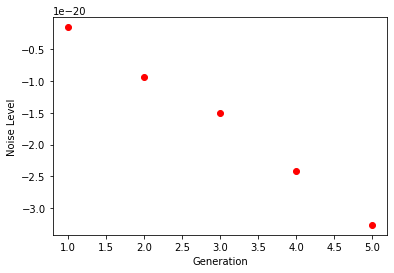

In [113]:
plt.plot([1,2,3,4,5],[np.amin((generations)[2][0]), np.amin((generations)[2][1]), np.amin((generations)[2][2]), np.amin((generations)[2][3]), np.amin((generations)[2][4])], 'ro')
plt.xlabel('Generation')
plt.ylabel('Noise Level')

In [112]:
len(list(generations[2]))

5

In [107]:
np.arange(1,len(list(generations[0])))

array([1, 2, 3, 4])

In [90]:
def EDFA_Model(fibre_length, pump_power, pump_wavelength):

    length = fibre_length
    Pp = pump_power
    wl = pump_wavelength

    def finding_N1_N2 (P_s, #power of signal
                   P_p, #power of pump
                   P_A_j, #array of powers of ASE noise at given frequencies
                   nu_s, #frequency of signal
                   nu_p, #frequency of pump
                   nu_j, #array of ASE frequencies 
                   sigma_s_a, sigma_s_e, #absorption and emission coeff for signal
                   sigma_p_a, sigma_p_e, #absorption and emission coeff for pump
                   sigma_nu_j_a,sigma_nu_j_e, #absorption and emission coeff arrays for ASE frequencies
                   overlap_s, #overlap factor for signal
                   overlap_p, #overlap factor for pump
                   overlap_nu_j, #array of overlap factors for ASE frequencies
                   N=0.7e-19,
                   tau=10.2e-3,
                   A=3e-6): 

        const = tau/(A*scipy.constants.h)
        ASE_comp = const*np.divide(np.multiply(overlap_nu_j,P_A_j),nu_j)
        sig_comp = const*overlap_s*P_s/nu_s
        pump_comp = const*overlap_p*P_p/nu_p
        numerator = sig_comp*sigma_s_a+np.sum(np.multiply(ASE_comp,sigma_nu_j_a))+pump_comp*sigma_p_a
        denomerator = (sig_comp*(sigma_s_a+sigma_s_e)+
                       np.sum(np.multiply(ASE_comp,(np.add(sigma_nu_j_a,sigma_nu_j_e))))
                       +pump_comp*(sigma_p_a+sigma_p_e))
        N2 = N*(numerator/denomerator)
        N1 = N-N2
        return N1,N2

    n_freq =3 

    kwargs_finding_N1_N2 ={
       'nu_s':1550, #wavelength of signal (nm)
       'nu_p':wl, #wavelength of pump(nm)
       'nu_j':list(range(1549, 1549+n_freq)), #array of ASE frequencies (nm)
       'sigma_s_a':2.910556e-34, 'sigma_s_e':4.0118853e-18, #absorption and emission coeff for signal (m^2)
       'sigma_p_a':2.7876712e-25, 'sigma_p_e':0.0810563e-25, #absorption and emission coeff for pump (m^2)
       'sigma_nu_j_a':[2.910556e-34]*n_freq,'sigma_nu_j_e':[4.0118853e-18]*n_freq,#absorption and emission coeff arrays for ASE frequencies
       #'alpha_nu_j':[2]*n_freq, #array of attenuations for ASE frequencies (dB/Km)
       'overlap_s':0.4, #overlap factor for signal
       'overlap_p':0.64, #overlap factor for pump
       'overlap_nu_j':[0.4]*n_freq, #array of overlap factors for ASE frequencies
       'N':0.7e-19,
       'tau':10.2e-3,
       'A':3e-6} # bandwidth ASE (nm)}



    N1,N2 = finding_N1_N2(1,1,[0,0,0],**kwargs_finding_N1_N2)

    Powers =[0.02,Pp]+[0]*n_freq*2

    def propagation_eq (Powers,
                       nu_s, #frequency of signal
                       nu_p, #frequency of pump
                       nu_j, #array of ASE frequencies 
                       sigma_s_a, sigma_s_e, #absorption and emission coeff for signal
                       sigma_p_a, sigma_p_e, #absorption and emission coeff for pump
                       sigma_nu_j_a,sigma_nu_j_e,#absorption and emission coeff arrays for ASE frequencies
                       alpha_nu_j, #array of attenuations for ASE frequencies (dB/Km)
                       overlap_s, #overlap factor for signal
                       overlap_p, #overlap factor for pump
                       overlap_nu_j, #array of overlap factors for ASE frequencies
                       N=0.7e-19,
                       tau=10.2e-3,
                       A=3e-6,
                       alpha_s=2, # attenuation of signal (dB/Km)
                       alpha_p=2.4,#attenuation of pump(dB/Km)
                       delta_nu_j=1): # bandwidth ASE (nm)

        P_s= Powers[0] #power of signal
        P_p= Powers[1] #power of pump
        P_A_j_minus= Powers[2:int((len(Powers)-2)/2)+2] #array of powers of ASE noise at
                                                        #given frequencies backward travelling

        P_A_j_plus = Powers[int((len(Powers)-2)/2)+2:]#array of powers of ASE noise at 
                                                      #given frequencies forward travelling

        P_A_j = np.add(P_A_j_minus, P_A_j_plus) #array of powers of ASE noise at given frequencies forward

        N1,N2 = finding_N1_N2 (P_s,P_p, P_A_j, nu_s, nu_p, nu_j, sigma_s_a, sigma_s_e, sigma_p_a, sigma_p_e, 
                               sigma_nu_j_a,sigma_nu_j_e, overlap_s, overlap_p, overlap_nu_j, 
                               N, tau, A) 

        #print(N1,N2)
        def finding_d_power(sigma_a, sigma_e, overlap, P, alpha):
            return (N2*sigma_e-N1*sigma_a)*overlap*P-alpha*P

        dP_p = finding_d_power(sigma_p_a,sigma_p_e, overlap_p,P_p, alpha_p)
        dP_s = finding_d_power(sigma_s_a,sigma_s_e, overlap_s,P_s, alpha_s) 
        #print(dP_s, dP_p)

        def find_d_powers_ASE(sigma_a, sigma_e, P, alpha,nu):    
            def d_power_ASE(sigma_a, sigma_e, P, alpha,nu):
                return (finding_d_power(sigma_a, sigma_e, overlap_s, P, alpha)
                        +N2*sigma_e*overlap_s*scipy.constants.h*delta_nu_j
                       -alpha*P)
            return np.array(list(map(lambda i: d_power_ASE(sigma_a[i], sigma_e[i], P[i], alpha[i],nu[i]),
                                     range(len(sigma_a)))))



        dP_A_j_plus = find_d_powers_ASE(sigma_nu_j_a,sigma_nu_j_e,P_A_j_plus,alpha_nu_j,nu_j)
        dP_A_j_minus = -find_d_powers_ASE(sigma_nu_j_a,sigma_nu_j_e,P_A_j_minus,alpha_nu_j,nu_j)
        #print(dP_s, dP_p, dP_A_j_plus, dP_A_j_minus)

        dPowers = np.hstack([[dP_s,dP_p],dP_A_j_minus,dP_A_j_plus])

        return dPowers


    n_freq =3 
    kwargs_propagation_eq ={
       'nu_s':1550, #frequency of signal (nm)
       'nu_p':980, #frequency of pump(nm)
       'nu_j':list(range(1549, 1549+n_freq)), #array of ASE frequencies (nm)
       'sigma_s_a':2.91e-34, 'sigma_s_e':4.01e-18, #absorption and emission coeff for signal (m^2)
       'sigma_p_a':2.788e-25, 'sigma_p_e':0.08e-25, #absorption and emission coeff for pump (m^2)
       'sigma_nu_j_a':[2.91e-34]*n_freq,'sigma_nu_j_e':[4.01e-18]*n_freq,#absorption and emission coeff arrays for ASE frequencies
       'alpha_nu_j':[2]*n_freq, #array of attenuations for ASE frequencies (dB/Km)
       'overlap_s':0.4, #overlap factor for signal
       'overlap_p':0.64, #overlap factor for pump
       'overlap_nu_j':[0.4]*n_freq, #array of overlap factors for ASE frequencies
       'N':0.7e-19,
       'tau':10.2e-3,
       'A':3e-6,
       'alpha_s':2, # attenuation of signal (dB/Km)
       'alpha_p':2.4,#attenuation of pump(dB/Km)
       'delta_nu_j':1} # bandwidth ASE (nm)}


    def solve_field_eq(P_0,z,kwargs):
        eq_to_solve = lambda P,z:propagation_eq(P,**kwargs)
        powers= odeint(eq_to_solve,P_0,z)
        print(powers)
        return powers,z


    p,z =solve_field_eq(Powers,np.linspace(0,length,10),kwargs_propagation_eq);


    def power_ASE(Powers):

        P_ASE = np.sum(Powers[:,+2:], axis=1) #array of powers of ASE noise at given frequencies forward
        return P_ASE

    def gain(Powers):
        return Powers[:,0]/Powers[0,0]

    def pow2db(value):
        return 10*np.log10(value)
         
        
    def db2pow(value):
        return np.power(10,value/10)

    def SNR(Powers):
        p_ase = power_ASE(Powers)
        p_ase[0] = -1e-75
        return np.divide(Powers[:,0],p_ase)


    def NF (Powers):
        snr = SNR(Powers)
    #     try:
        return snr[-1]/snr[0] #SNRout is the last element of Powers and SNRin is the first element of Powers
    #     except:
    #         return none
    # NoiseFigure = NF(p)
    # NoiseFigure

    SNRa = SNR(p)
    SNRa

    NoiseFigure = NF(p)
    NoiseFigure_dB = pow2db(NoiseFigure)

    return NoiseFigure

a = EDFA_Model(10, 20e-3, 980)
a

[[ 2.00000000e-02  2.00000000e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.16736554e-03  1.38967798e-03 -2.51434968e-76 -2.51434968e-76
  -2.51434968e-76  2.28867190e-78  2.28867190e-78  2.28867190e-78]
 [ 2.34873169e-04  9.65597514e-05 -2.15747536e-74 -2.15747536e-74
  -2.15747536e-74  1.49429494e-78  1.49429494e-78  1.49429494e-78]
 [ 2.54535533e-05  6.70921584e-06 -1.83828212e-72 -1.83828212e-72
  -1.83828212e-72  9.58830569e-79  9.58830569e-79  9.58830569e-79]
 [ 2.75769795e-06  4.66165514e-07 -1.57073925e-70 -1.57073925e-70
  -1.57073925e-70  6.12777222e-79  6.12777222e-79  6.12777222e-79]
 [ 2.99910546e-07  3.31454581e-08 -1.33629379e-68 -1.33629379e-68
  -1.33629379e-68  3.86416515e-79  3.86416515e-79  3.86416515e-79]
 [ 3.18660177e-08  2.08988691e-09 -1.15765724e-66 -1.15765724e-66
  -1.15765724e-66  3.20248659e-79  3.20248659e-79  3.20248659e-79]
 [ 3.66860510e-09  1.94619634e-10 -1.05707577e-64 -1.05707577e-64
  -

1.0109615867755397e-20

# Ignore everything below

In [78]:
solution = np.zeros([100, 1])

for i in range(len(population)):
    solution[i] = ((population[i][0]*population[i][1]*population[i][2])/3)
    
solution

array([[1332.46626224],
       [ 973.63287382],
       [  79.36291052],
       [ 390.99796817],
       [1140.55085629],
       [ 320.68851849],
       [ 306.44094028],
       [ 638.76865307],
       [ 151.69384099],
       [ 290.57775422],
       [ 132.444243  ],
       [ 330.28261131],
       [ 438.99325034],
       [ 446.7887986 ],
       [ 675.2130767 ],
       [ 484.50327072],
       [ 384.36988243],
       [ 422.58849295],
       [ 787.86931186],
       [ 596.76710286],
       [ 120.0994219 ],
       [ 132.14826313],
       [1229.70210073],
       [ 748.67401561],
       [ 331.21427149],
       [ 247.36161305],
       [ 418.05680648],
       [ 811.18462651],
       [ 336.94947546],
       [ 669.42895448],
       [ 170.63452128],
       [ 944.46167731],
       [ 355.46424687],
       [ 483.61744084],
       [1125.86333891],
       [ 101.64283309],
       [ 271.87839655],
       [ 428.54073696],
       [1023.34843653],
       [ 717.92611794],
       [  98.41624957],
       [ 833.392

In [73]:
np.mean(solution)

485.1409107132838

In [82]:
a = fitness(population)
min(abs(a))

array([0.63764])

In [89]:
parents = np.empty((10, 3))
parents

array([[1.05475334e-311, 9.58487353e-322, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 5.02034658e+175],
       [3.79823469e+175, 1.16391660e+165, 1.79584374e-052],
       [4.08594369e+179, 5.01163111e+217, 5.49419094e-143],
       [9.80058441e+252, 1.30304358e-142, 2.14027814e+161],
       [5.04621383e+180, 4.50618615e-144, 7.79952704e-143],
       [6.01352666e-067, 2.62967465e+179, 8.70264083e-071],
       [3.79100468e+179, 1.41529403e+161, 9.16651763e-072],
       [4.31217112e+097, 1.14482968e-071, 3.08395576e+126],
       [9.30350598e+199, 3.67152475e-062, 1.58268989e-319]])

In [51]:
for i in range(5):
    print(i)

0
1
2
3
4


In [104]:
parents = (1, 10, 1)

# parent_num = 10
# parents[parent_num, :]

for i in range(len(parents)):
    print(i%parents)

TypeError: unsupported operand type(s) for %: 'int' and 'tuple'

In [103]:
offspring_size = 4

offspring = np.zeros(offspring_size)

offspring

array([0., 0., 0., 0.])

In [113]:
generations = np.arange(2, 11, 1)
generations

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [117]:
for i in range(len(generations)):
    print("Generation {}".format(i+1))
    print()
    print('i')

Generation 1

i
Generation 2

i
Generation 3

i
Generation 4

i
Generation 5

i
Generation 6

i
Generation 7

i
Generation 8

i
Generation 9

i


In [2]:
Powers =[0.02,0.3]+[0]*3*2
Powers

[0.02, 0.3, 0, 0, 0, 0, 0, 0]

[[ 2.00000000e-02  3.00000000e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.16736034e-03  2.08450283e-02 -3.77128202e-75 -3.77128202e-75
  -3.77128202e-75  3.43298848e-77  3.43298848e-77  3.43298848e-77]
 [ 2.34872306e-04  1.44837989e-03 -3.23564988e-73 -3.23564988e-73
  -3.23564988e-73  2.24146887e-77  2.24146887e-77  2.24146887e-77]
 [ 2.54525986e-05  1.00638029e-04 -2.75553197e-71 -2.75553197e-71
  -2.75553197e-71  1.43765009e-77  1.43765009e-77  1.43765009e-77]
 [ 2.75813169e-06  6.99161950e-06 -2.35026851e-69 -2.35026851e-69
  -2.35026851e-69  9.22097374e-78  9.22097374e-78  9.22097374e-78]
 [ 2.98901344e-07  4.86785217e-07 -2.00620062e-67 -2.00620062e-67
  -2.00620062e-67  5.87199171e-78  5.87199171e-78  5.87199171e-78]
 [ 3.23024180e-08  3.33990621e-08 -1.75733582e-65 -1.75733582e-65
  -1.75733582e-65  4.00255681e-78  4.00255681e-78  4.00255681e-78]
 [ 3.51357987e-09  2.45466122e-09 -1.61215373e-63 -1.61215373e-63
  -

1.2941220128655265e-19

In [36]:
p[:,0] 

array([ 2.00000000e-02,  2.16736034e-03,  2.34872306e-04,  2.54525986e-05,
        2.75813169e-06,  2.98901344e-07,  3.23024180e-08,  3.51357987e-09,
       -5.45450504e-11, -4.99226249e-10])